# Data Mining and Visualization-Part 1

In this first part, I will initially explore and understand the given data set using statistic method
and visualization and do the pre-process that will be used for the classification task in the following
project parts.


In [1]:
# for inline plots in jupyter
%matplotlib inline 

In [2]:
#import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial import distance
from sklearn.model_selection import train_test_split 


In [3]:
sns.set(color_codes=True) # settings for seaborn plotting style
sns.set(rc={'figure.figsize':(5,5)}) # settings for seaborn plot sizes

In [4]:
df = pd.read_csv("./marketing_campaigns_train.csv", index_col=0)

In [5]:
df, X_valid = train_test_split(df, test_size=0.2, random_state=42) 

# Getting to know the data

In [6]:
print("Shape: ", df.shape)
df.head()

Shape:  (24413, 20)


,status,age,n_child,education,profession,device,account_balance,loan,mortgage,credit,positive,campaign_type,consent,n_contact,l_date,l_call_duration,p_outcome,n_p_contact,p_days,subscribed
id,,,,,,,,,,,,,,,,,,,,
527515,single,47,unknown,doctoral,manager,cellular,290,True,True,False,True,phone call,False,3,09-Nov,232,failure,2,378,False
491721,married,44,unknown,master,technician,unknown,233,False,False,False,True,phone call,False,1,06-Jun,18,unknown,0,-1,False
524298,married,92,unknown,unknown,accountant,cellular,708,False,False,False,True,phone call,True,3,22-Oct,284,unknown,0,-1,True
509981,single,36,unknown,master,technician,cellular,10,False,True,False,True,phone call,False,2,21-Nov,127,unknown,0,-1,False
498731,divorced,33,unknown,master,teacher,cellular,50,True,False,False,True,phone call,True,1,23-Jul,478,unknown,0,-1,True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24413 entries, 527515 to 489969
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   status           24413 non-null  object
 1   age              24413 non-null  int64 
 2   n_child          24413 non-null  object
 3   education        24413 non-null  object
 4   profession       24413 non-null  object
 5   device           24413 non-null  object
 6   account_balance  24413 non-null  int64 
 7   loan             24413 non-null  bool  
 8   mortgage         24413 non-null  bool  
 9   credit           24413 non-null  bool  
 10  positive         24413 non-null  bool  
 11  campaign_type    24413 non-null  object
 12  consent          24413 non-null  bool  
 13  n_contact        24413 non-null  int64 
 14  l_date           24413 non-null  object
 15  l_call_duration  24413 non-null  int64 
 16  p_outcome        24413 non-null  object
 17  n_p_contact      24413 no

In [8]:
data = df.replace("unknown", np.nan)
X_valid=X_valid.replace("unknown", np.nan)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24413 entries, 527515 to 489969
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   status           24413 non-null  object
 1   age              24413 non-null  int64 
 2   n_child          8592 non-null   object
 3   education        23414 non-null  object
 4   profession       24264 non-null  object
 5   device           17326 non-null  object
 6   account_balance  24413 non-null  int64 
 7   loan             24413 non-null  bool  
 8   mortgage         24413 non-null  bool  
 9   credit           24413 non-null  bool  
 10  positive         24413 non-null  bool  
 11  campaign_type    24413 non-null  object
 12  consent          24413 non-null  bool  
 13  n_contact        24413 non-null  int64 
 14  l_date           24413 non-null  object
 15  l_call_duration  24413 non-null  int64 
 16  p_outcome        4485 non-null   object
 17  n_p_contact      24413 no

In [9]:
data.head()

,status,age,n_child,education,profession,device,account_balance,loan,mortgage,credit,positive,campaign_type,consent,n_contact,l_date,l_call_duration,p_outcome,n_p_contact,p_days,subscribed
id,,,,,,,,,,,,,,,,,,,,
527515,single,47,NaN,doctoral,manager,cellular,290,True,True,False,True,phone call,False,3,09-Nov,232,failure,2,378,False
491721,married,44,NaN,master,technician,NaN,233,False,False,False,True,phone call,False,1,06-Jun,18,NaN,0,-1,False
524298,married,92,NaN,NaN,accountant,cellular,708,False,False,False,True,phone call,True,3,22-Oct,284,NaN,0,-1,True
509981,single,36,NaN,master,technician,cellular,10,False,True,False,True,phone call,False,2,21-Nov,127,NaN,0,-1,False
498731,divorced,33,NaN,master,teacher,cellular,50,True,False,False,True,phone call,True,1,23-Jul,478,NaN,0,-1,True


In [10]:
data.describe(include='all')


,status,age,n_child,education,profession,device,account_balance,loan,mortgage,credit,positive,campaign_type,consent,n_contact,l_date,l_call_duration,p_outcome,n_p_contact,p_days,subscribed
count,24413,24413.000000,8592,23414,24264,17326,24413.000000,24413,24413,24413,24413,24413,24413,24413.000000,24413,24413.000000,4485,24413.000000,24413.000000,24413
unique,3,NaN,4,3,11,2,NaN,2,2,2,2,1,2,NaN,305,NaN,3,NaN,NaN,2
top,married,NaN,1,master,engineer,cellular,NaN,False,True,False,True,phone call,False,NaN,15-May,NaN,failure,NaN,NaN,False
freq,14694,NaN,2491,12493,5235,15803,NaN,20488,13652,23976,22433,24413,21597,NaN,622,NaN,2700,NaN,NaN,21597
mean,NaN,40.808872,NaN,NaN,NaN,NaN,1216.690411,NaN,NaN,NaN,NaN,NaN,NaN,2.771925,NaN,233.252529,NaN,0.585426,40.915414,NaN
std,NaN,10.541131,NaN,NaN,NaN,NaN,2693.282858,NaN,NaN,NaN,NaN,NaN,NaN,3.114138,NaN,232.642901,NaN,2.585037,101.339896,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,-7207.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2.000000,NaN,0.000000,-1.000000,NaN
25%,NaN,33.000000,NaN,NaN,NaN,NaN,74.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,95.000000,NaN,0.000000,-1.000000,NaN
50%,NaN,39.000000,NaN,NaN,NaN,NaN,408.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,163.000000,NaN,0.000000,-1.000000,NaN
75%,NaN,48.000000,NaN,NaN,NaN,NaN,1272.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,286.000000,NaN,0.000000,-1.000000,NaN


 columns with missing values are:'n_child','education','device','p_outcome'


#### Split to attributes and target
our target is-subscribe: has the customer subscribed to life insurance?

In [11]:
target =pd.DataFrame(data['subscribed'])
data = data.drop('subscribed', axis=1)
target.describe()

,subscribed
count,24413
unique,2
top,False
freq,21597


#### Split to nominal and numerical attributes

In [12]:
num_data = pd.DataFrame(data.select_dtypes(include=['int64'])) # to get the numeric columns
nom_data = pd.DataFrame(data.select_dtypes(exclude=['int64'])) # to get the nomenoal columns

num_col=num_data.columns
nom_col=nom_data.columns

## Data Statistics

In [13]:
num_data.describe()


,age,account_balance,n_contact,l_call_duration,n_p_contact,p_days
count,24413.000000,24413.000000,24413.000000,24413.000000,24413.000000,24413.000000
mean,40.808872,1216.690411,2.771925,233.252529,0.585426,40.915414
std,10.541131,2693.282858,3.114138,232.642901,2.585037,101.339896
min,18.000000,-7207.000000,1.000000,2.000000,0.000000,-1.000000
25%,33.000000,74.000000,1.000000,95.000000,0.000000,-1.000000
50%,39.000000,408.000000,2.000000,163.000000,0.000000,-1.000000
75%,48.000000,1272.000000,3.000000,286.000000,0.000000,-1.000000
max,95.000000,91924.000000,63.000000,4428.000000,275.000000,871.000000


#### calculate quartiles

In [14]:
quantlines = [0.05,0.1,0.25,0.5,0.75,0.9,0.95]
quartiles_table = pd.DataFrame(index = quantlines)

for col in num_col:
    quartiles_table[col] = num_data[col].quantile(quantlines)
display(quartiles_table)



,age,account_balance,n_contact,l_call_duration,n_p_contact,p_days
0.05,27.0,-153.0,1.0,34.0,0.0,-1.0
0.10,29.0,10.0,1.0,55.0,0.0,-1.0
0.25,33.0,74.0,1.0,95.0,0.0,-1.0
0.50,39.0,408.0,2.0,163.0,0.0,-1.0
0.75,48.0,1272.0,3.0,286.0,0.0,-1.0
0.90,56.0,3199.2,5.0,490.0,2.0,188.0
0.95,59.0,5173.0,8.0,670.0,3.0,322.0


### Numerical data:
#### histograms:

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


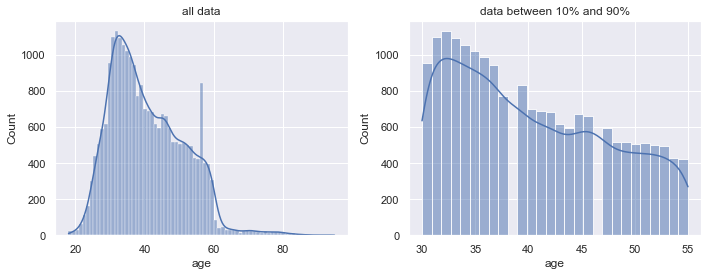

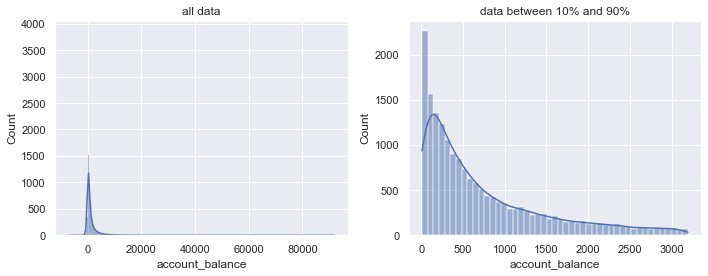

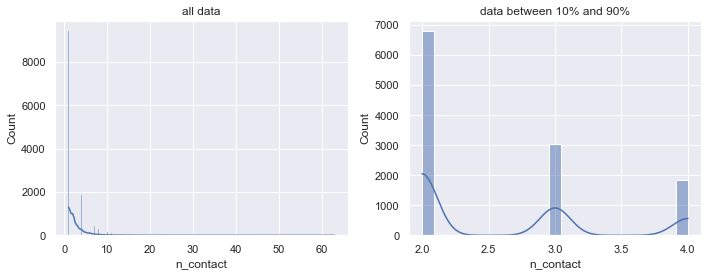

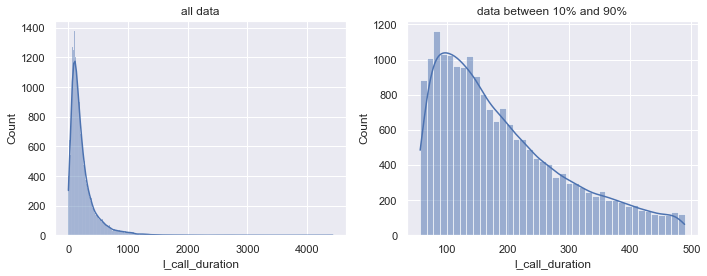

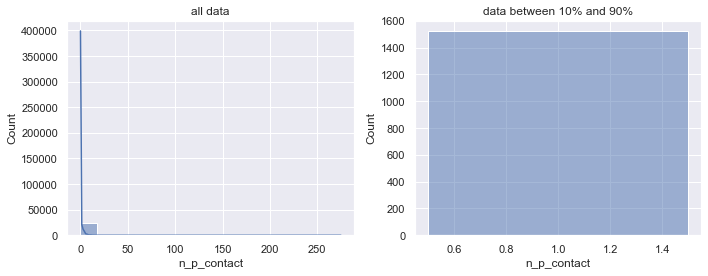

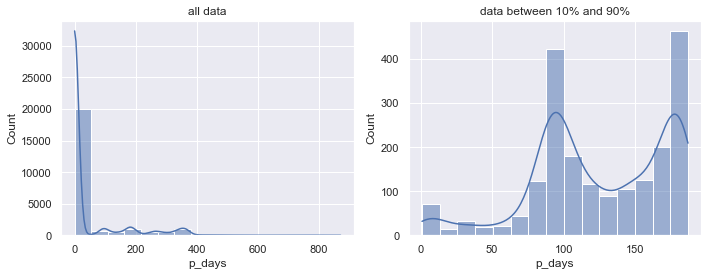

In [15]:

for col in num_col:
    fig,ax = plt.subplots(1, 2,figsize=[10,4])
    sns.histplot(num_data[col],ax=ax[0],kde=True,).set(title='all data')
    num_col_in_range = num_data[col][num_data[col].between(quartiles_table[col].iat[1], quartiles_table[col].iat[5], inclusive=False) ]
    sns.histplot(num_col_in_range,kde=True, ax=ax[1]).set(title='data between 10% and 90%')
    plt.tight_layout()


#### Skweness:

In [16]:

for col in num_col:
    sk=num_data[col].skew(axis = 0, skipna = True)
    print("skweness of",col,": ",sk ,end='\n')
    

skweness of age :  0.6945758993515094
skweness of account_balance :  8.46378215188683
skweness of n_contact :  4.822596247414544
skweness of l_call_duration :  3.3558569416126125
skweness of n_p_contact :  52.11019807623236
skweness of p_days :  2.579263789027753


#### Median:

In [17]:
median_array=[]
for col in num_col:
    val=num_data[col].median(axis = 0, skipna = True)
    median_array.append(val)
    print("median of",col,": ",val,end='\n')

median of age :  39.0
median of account_balance :  408.0
median of n_contact :  2.0
median of l_call_duration :  163.0
median of n_p_contact :  0.0
median of p_days :  -1.0


### Nominal data:

In [18]:
nom_data_describe = nom_data.describe()
nom_data_describe.loc['%freq'] = nom_data_describe.apply(lambda x: np.round(x.loc['freq']/30517, decimals=3))
nom_data_describe

,status,n_child,education,profession,device,loan,mortgage,credit,positive,campaign_type,consent,l_date,p_outcome
count,24413,8592,23414,24264,17326,24413,24413,24413,24413,24413,24413,24413,4485
unique,3,4,3,11,2,2,2,2,2,1,2,305,3
top,married,1,master,engineer,cellular,False,True,False,True,phone call,False,15-May,failure
freq,14694,2491,12493,5235,15803,20488,13652,23976,22433,24413,21597,622,2700
%freq,0.482,0.082,0.409,0.172,0.518,0.671,0.447,0.786,0.735,0.8,0.708,0.02,0.088


#### Remove campaign_type column:


from the table above we can see that for the 'campaign_type' attribute we only have one unique value (and no missing values)
so this column does not add any information and we can delete it.

In [19]:
data.drop('campaign_type',axis='columns', inplace=True)
nom_data.drop('campaign_type',axis='columns', inplace=True)
df.drop('campaign_type',axis='columns', inplace=True)

X_valid.drop('campaign_type',axis='columns', inplace=True)

#### Histograms
The column 'l_date' has to many unique values so there is no reason to look on its histogram.

In [20]:
nom_data_str = nom_data.astype(str) #convert nom_data table to string
nom_col_str = nom_data_str.columns # take all columns of nom_data_atr table

In [21]:
fixed_nom_col_str = nom_col_str.copy()
fixed_nom_col_str=fixed_nom_col_str.drop('l_date')

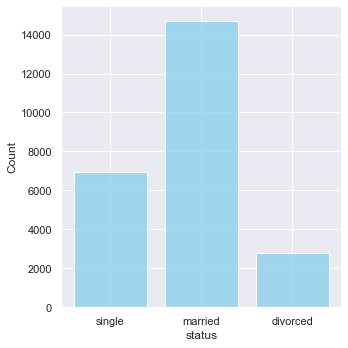

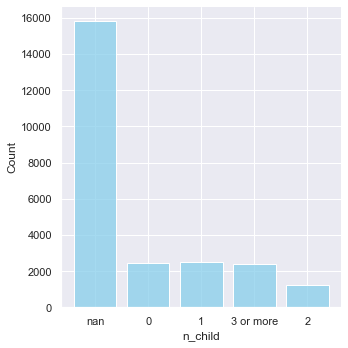

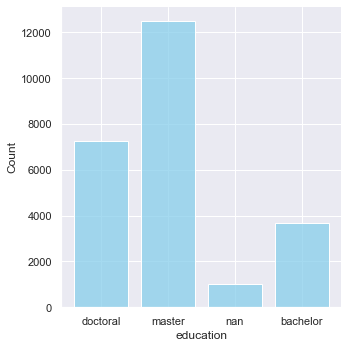

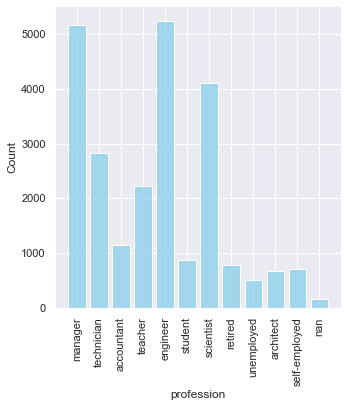

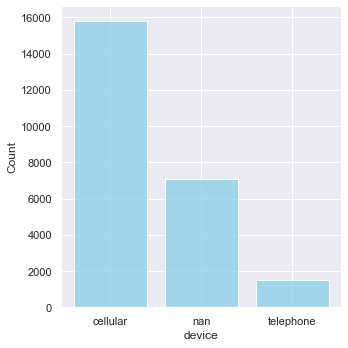

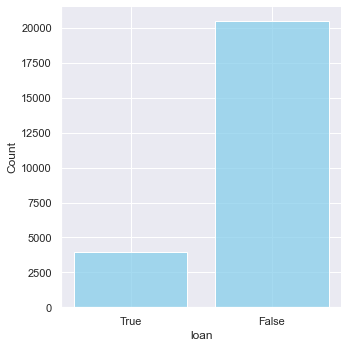

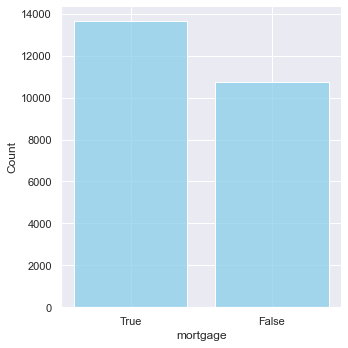

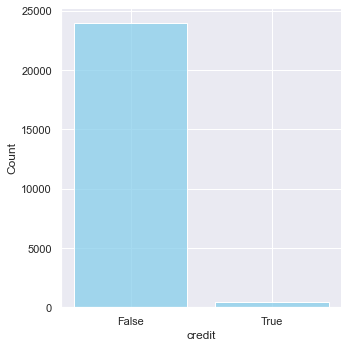

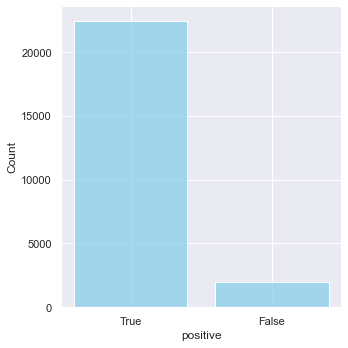

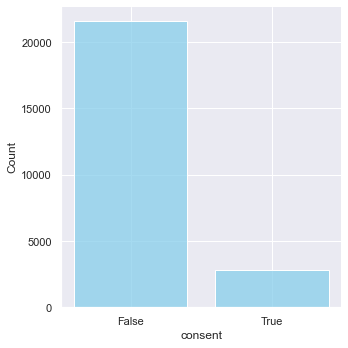

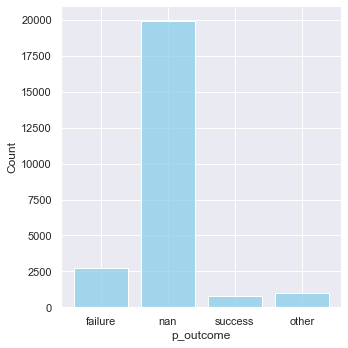

In [22]:

for col in fixed_nom_col_str:
        g = sns.displot(nom_data_str, x=col, shrink=.8, color='skyblue')
        if col == 'profession':
            g.set_xticklabels(rotation=90)



### Target:
#### histogram + pie chart:

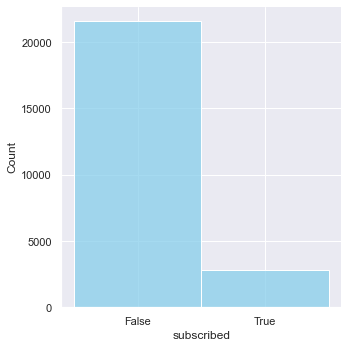

In [23]:
sns.displot(target.astype(str), x='subscribed', color='skyblue', discrete=True)

#### Pie chart :

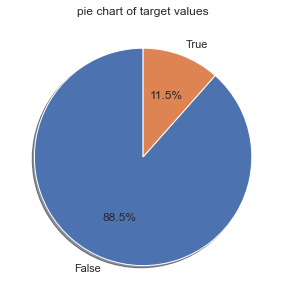

In [24]:

plt.pie(target['subscribed'].value_counts(), labels=target['subscribed'].unique(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('pie chart of target values')
plt.show()

### Exploring the behavior of the attributes according to the target values

### numerical data:

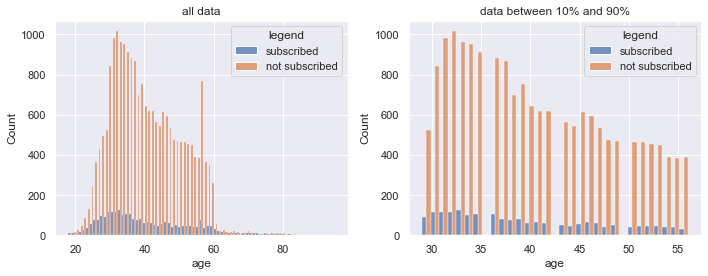

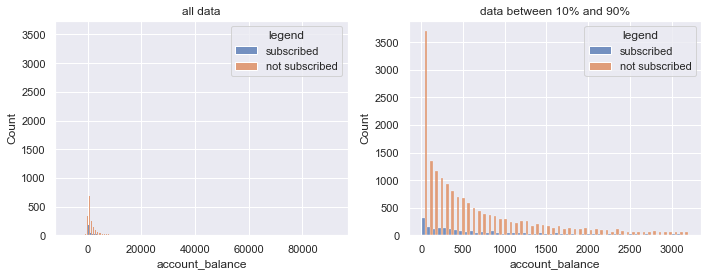

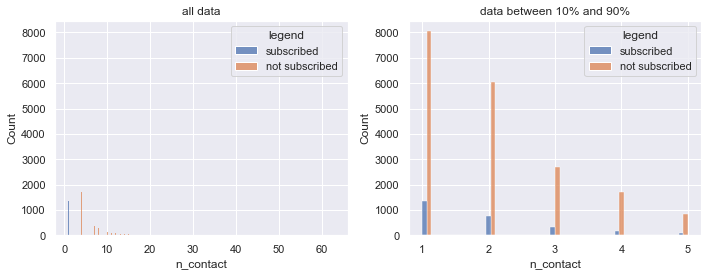

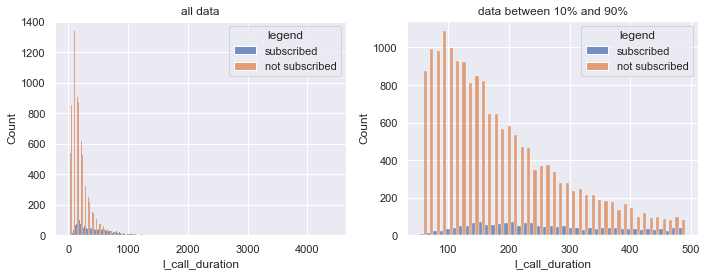

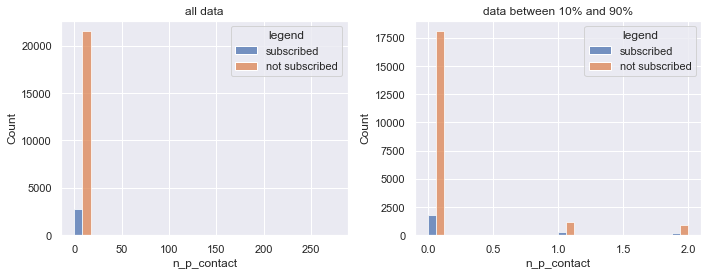

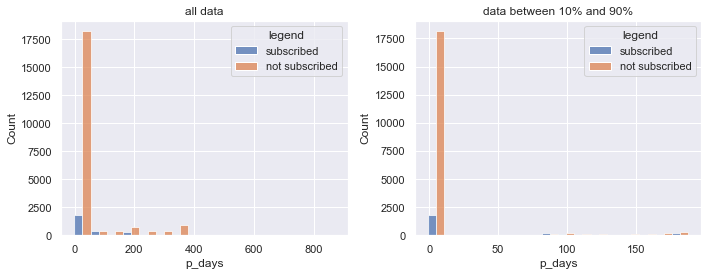

In [25]:
data_with_subcribed=data.copy()
data_with_subcribed['subscribed']=target   
for col in num_col:
    fig,ax = plt.subplots(1, 2,figsize=[10,4])
    data_check=data_with_subcribed[[col,'subscribed']]
    
    x=data_check.loc[data_check['subscribed']][col]
    y=data_check.loc[data_check['subscribed']==False][col]
    check=pd.concat(axis=0, ignore_index=True, objs=[
        pd.DataFrame.from_dict({col: x, 'legend': 'subscribed'}),
        pd.DataFrame.from_dict({col: y, 'legend': 'not subscribed'})
    ])
    sns.histplot(data=check,x=col, hue='legend', multiple='dodge',ax=ax[0]).set(title='all data')
    data_check = data_check.loc[(data_check[col]>=quartiles_table[col].iat[1])& (data_check[col]<=quartiles_table[col].iat[5]) ]
    x=data_check.loc[data_check['subscribed']][col]
    y=data_check.loc[data_check['subscribed']==False][col]
    check=pd.concat(axis=0, ignore_index=True, objs=[
        pd.DataFrame.from_dict({col: x, 'legend': 'subscribed'}),
        pd.DataFrame.from_dict({col: y, 'legend': 'not subscribed'})
    ])
    sns.histplot(data=check, x=col, hue='legend', multiple='dodge', ax=ax[1]).set(title='data between 10% and 90%')
    plt.tight_layout()


### nominal data:

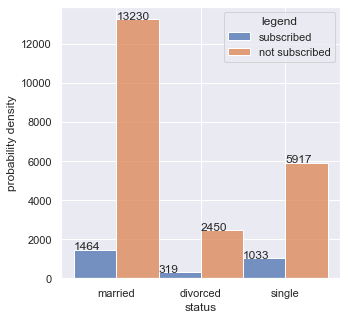

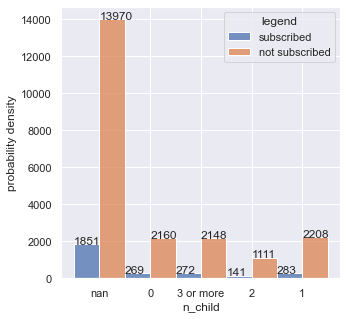

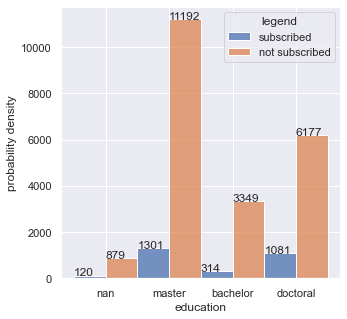

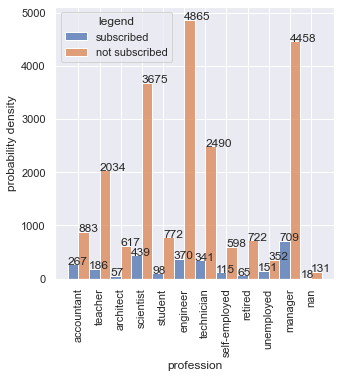

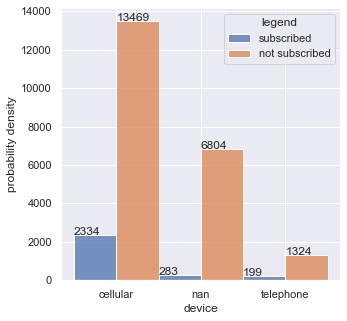

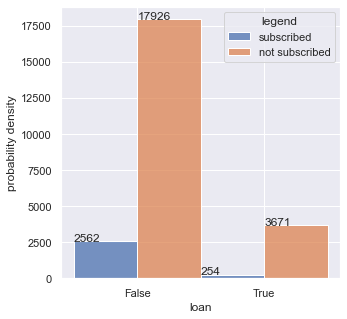

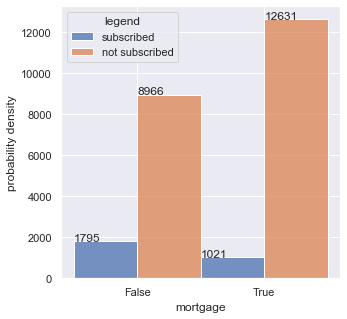

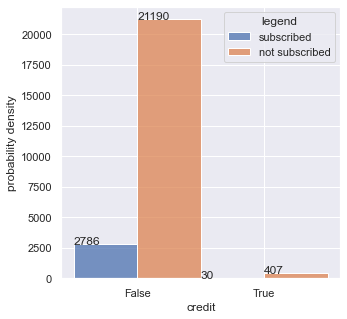

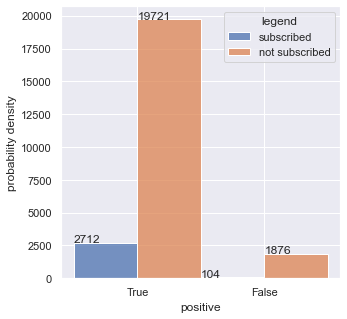

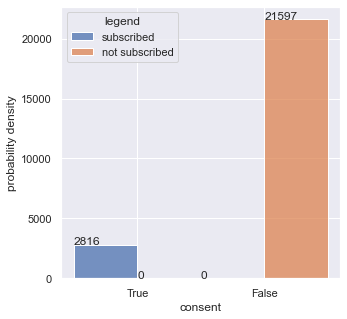

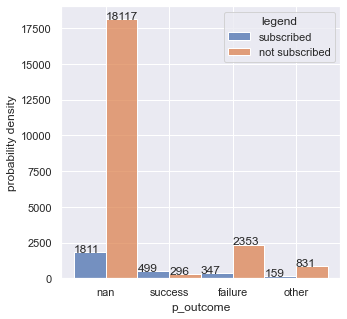

In [26]:
# try to put also probability
nom_data_sub=nom_data_str.copy()
nom_data_sub['subscribed']=target
count = 0
number_total = 0
number_true = 0
for cols in fixed_nom_col_str:
    check=nom_data_sub[[ cols,'subscribed']]
    x=check.loc[check['subscribed']][cols]
    y=check.loc[check['subscribed']==False][cols]
    check=pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({cols: x, 'legend': 'subscribed'}),
    pd.DataFrame.from_dict({cols: y, 'legend': 'not subscribed'})
    ])
    fig, ax = plt.subplots()
    plt.ylabel("probability density")
    g=sns.histplot(data=check, x=cols, hue='legend', multiple='dodge', ax=ax)
        
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height())) # adding height of column
      # ax.annotate(str(format(((p.get_height()/30517)*100),".3f")) + '%', (p.get_x(), p.get_height())) # adding presentage of true from all people in dataset
    if cols == 'profession':
        plt.xticks(rotation=90)
    
    


### Remove consent column:
from the bars graph of consent vs subscribes we can that tose columns are identical.

because only not subscribed have false consent and only subcribed have true consent 


In [27]:
data.drop('consent',axis='columns', inplace=True)
nom_data.drop('consent',axis='columns', inplace=True)
df.drop('consent',axis='columns', inplace=True)


In [28]:
X_valid.drop('consent',axis='columns', inplace=True)

### observe the histograms without the dominant value:

#### n_p_contact attribute:

<AxesSubplot:xlabel='n_p_contact', ylabel='Count'>

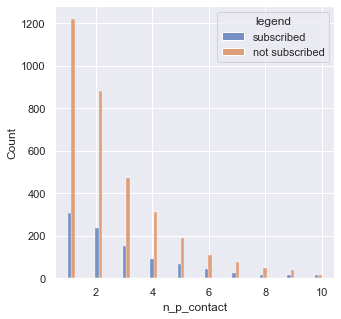

In [29]:
check_n_p_contact=df.copy()[['n_p_contact','subscribed']]
#selecting n_p_contanct values in which the value counts is bigger than 10 and !=0
check_n_p_contact=check_n_p_contact.loc[(check_n_p_contact['n_p_contact']!=0) & (check_n_p_contact['n_p_contact']<=10)]
x=check_n_p_contact.loc[check_n_p_contact['subscribed']]['n_p_contact']
y=check_n_p_contact.loc[check_n_p_contact['subscribed']==False]['n_p_contact']
check_p_subscribed=pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'n_p_contact': x, 'legend': 'subscribed'}),
    pd.DataFrame.from_dict({'n_p_contact': y, 'legend': 'not subscribed'})
])
fig, ax = plt.subplots()
sns.histplot(data=check_p_subscribed, x='n_p_contact', hue='legend', multiple='dodge', ax=ax)

#### p_outcome attribute:

<AxesSubplot:xlabel='p_outcome', ylabel='Count'>

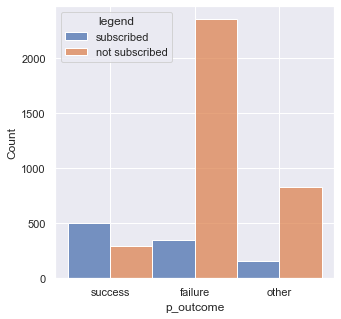

In [30]:
check_p_outcome=df.copy()[['p_outcome','subscribed']]
#selecting p_outcome values in which the value is not unknown
check_p_outcome=check_p_outcome.loc[check_p_outcome['p_outcome']!='unknown']
x=check_p_outcome.loc[check_p_outcome['subscribed']]['p_outcome']
y=check_p_outcome.loc[check_p_outcome['subscribed']==False]['p_outcome']
check_p_subscribed=pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'p_outcome': x, 'legend': 'subscribed'}),
    pd.DataFrame.from_dict({'p_outcome': y, 'legend': 'not subscribed'})
])
fig, ax = plt.subplots()
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height())) # adding height of column
sns.histplot(data=check_p_subscribed, x='p_outcome', hue='legend', multiple='dodge', ax=ax)


#### p_days attribute:

<AxesSubplot:xlabel='p_days', ylabel='Count'>

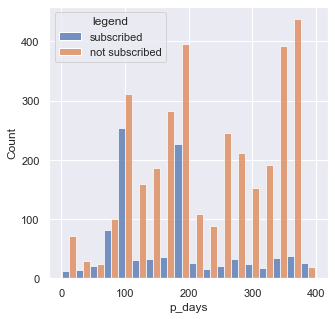

In [31]:
check_p_days=df.copy()[['p_days','subscribed']]
#selecting p_days values in which the value is not -1 and in range of (0,400)->the dominants values
check_p_days=check_p_days.loc[check_p_days['p_days']!=-1]
check_p_days=check_p_days.loc[(check_p_days['p_days']!=0) & (check_p_days['p_days']<=400)]
x=check_p_days.loc[check_p_days['subscribed']]['p_days']
y=check_p_days.loc[check_p_days['subscribed']==False]['p_days']
check=pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'p_days': x, 'legend': 'subscribed'}),
    pd.DataFrame.from_dict({'p_days': y, 'legend': 'not subscribed'})
])
fig, ax = plt.subplots()
sns.histplot(data=check, x='p_days', hue='legend', multiple='dodge', ax=ax)

#### Pivot Table:

index group: mortagae, positive.

we use np.mean() for the ‘age’ feature and np.sum() for the ‘subscribed’ feature:

In [32]:
data_sub=data.copy()
data_sub['subscribed']=target
table = pd.pivot_table(data_sub,index=['mortgage','positive'],aggfunc={'age':np.mean,'subscribed':np.sum})
table

age  subscribed
mortgage positive                       
False    False     41.990272          27
         True      42.963989        1768
True     False     38.944065          77
         True      39.171180         944

index group: credit, positive.

we use np.mean() for the ‘account_balance’ feature and np.sum() for the ‘subscribed’ feature:

In [33]:
data_with_subcribed=data.copy()
data_with_subcribed['subscribed']=target
table = pd.pivot_table(data_with_subcribed,index=['credit','positive'],aggfunc={'account_balance':np.mean,'subscribed':np.sum,})
table

account_balance  subscribed
credit positive                             
False  False         -269.326531          89
       True          1361.318837        2697
True   False         -502.194444          15
       True           221.787330          15

 #### l_call_duration attribute categories:

In [34]:
# l_call_duration attribute categories:

# we categories the l_call_duration attribute and check the precentage of subscribed people in each category
check_l_call_duration = df.copy()[['l_call_duration', 'subscribed']]

subscribed_true = check_l_call_duration.loc[check_l_call_duration['subscribed']]

group_l_call_duration = pd.cut(subscribed_true['l_call_duration'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000])

# p(category/subscribed)
group_l_call_duration = group_l_call_duration.value_counts().rename_axis('').to_frame('counts')
# base p(category/subscribed)*p(subscribed)=p(category^subscribed)
p_cat_and_sub = group_l_call_duration

group_l_call_duration = pd.cut(check_l_call_duration['l_call_duration'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000])
# p(category)
group_l_call_duration = group_l_call_duration.value_counts().rename_axis('').to_frame('counts')
# p(category^not_subscribed)
p_cat_and_not_sub = group_l_call_duration.sub(p_cat_and_sub)
# group_l_call_duration['%']=group_l_call_duration['counts'].div(subscribed_true.shape[0])*100

fixed_col = lambda lst, to_int=True: [int(lst[i][0]) if to_int else lst[i][0] for i, x in enumerate(lst)]

# group_l_call_duration Display pandas table

prob_table = pd.DataFrame([fixed_col(p_cat_and_sub.values), fixed_col(p_cat_and_not_sub.values),
                           fixed_col(group_l_call_duration.values), fixed_col(list(np.round(np.divide(p_cat_and_sub.values,
                                                                                       group_l_call_duration.values),
                                                                             3)), to_int=False)], columns=group_l_call_duration.index,
                          index=['subscribed=True', 'subscribed=False', 'sum', 'p(subscribed/category)'])

converted_col = lambda lst, to_int=True: [int(x) if to_int else x for x in lst]

tmp_data = [converted_col(x) + [sum(x)] if i < len(prob_table.values) - 1 else converted_col(x, to_int=False) + [''] for i, x in enumerate(prob_table.values)]

tmp_columns = list(prob_table) + ['Sum Up']

tmp_index = prob_table.index

tmp = pd.DataFrame(tmp_data, columns=tmp_columns, index=tmp_index)
# sum -> sum of all column
# conditional probability -> subscribed = True given a specific group

prob_table = tmp
prob_table

,"(0, 500]","(500, 1000]","(1000, 1500]","(1500, 2000]","(2000, 2500]","(2500, 3000]",Sum Up
subscribed=True,1748.000,830.000,200.000,28.00,6.000,4.000,2816
subscribed=False,20317.000,1111.000,132.000,22.00,7.000,5.000,21594
sum,22065.000,1941.000,332.000,50.00,13.000,9.000,24410
p(subscribed/category),0.079,0.428,0.602,0.56,0.462,0.444,


#### split 'l_date' attribute into month and day:

In [35]:
data[['l_day','l_month']] = data['l_date'].str.split('-', 1, expand=True)
data[['l_day','l_month']].describe()

X_valid[['l_day','l_month']] = X_valid['l_date'].str.split('-', 1, expand=True)

In [36]:
#change values of 'l_day' to int
data['l_day']=data['l_day'].astype('int64')
#change values of the l_month attribute according to the number of the month istead of the name
months_in_year = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
counter = 1
l_month_column = pd.DataFrame(data['l_month'].copy())
for month in months_in_year:
    l_month_column = l_month_column.replace(str(month), counter)
    counter = counter + 1
data['l_month'] = l_month_column
df['l_month'] = l_month_column #adding also to df table
df['l_day'] = data['l_day']


In [37]:
X_valid['l_day']=X_valid['l_day'].astype('int64')

counter = 1
l_month_column = pd.DataFrame(X_valid['l_month'].copy())
for month in months_in_year:
    l_month_column = l_month_column.replace(str(month), counter)
    counter = counter + 1
    
X_valid['l_month'] = l_month_column

In [38]:
data=data.drop(columns='l_date')
df=df.drop(columns='l_date')
X_valid=X_valid.drop(columns='l_date')

In [39]:
nom_data = pd.DataFrame(data.select_dtypes(exclude=['int64'])) # to get the nominal columns
num_data = pd.DataFrame(data.select_dtypes(include=['int64'])) # to get numeric columns

In [40]:
 data[['l_month','l_day']].describe()

,l_month,l_day
count,24413.000000,24413.000000
mean,6.139024,15.808586
std,2.395208,8.314536
min,1.000000,1.000000
25%,5.000000,8.000000
50%,6.000000,16.000000
75%,8.000000,21.000000
max,12.000000,31.000000


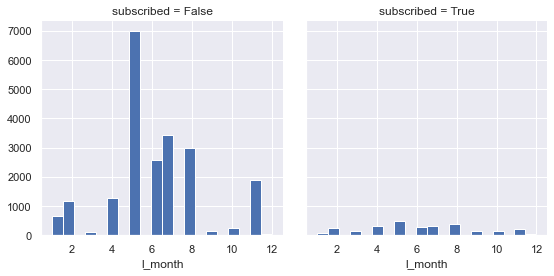

In [41]:
g = sns.FacetGrid(df, col='subscribed')
g.fig.set_size_inches(8,4)
g.map(plt.hist, 'l_month', bins=20);

In [42]:
#we categories the l_month attribute and check the precentage of subscribed people in each category
check_l_month=df.copy()[['l_month','subscribed']]

subscribed_true=check_l_month.loc[check_l_month['subscribed']]

group_l_month = pd.cut(subscribed_true['l_month'], bins=[0,3,6,9,12], ordered=True)
#p(category/subscribed)
group_l_month = group_l_month.value_counts(sort=False).rename_axis('').to_frame('counts')
#base p(category/subscribed)*p(subscribed)=p(category^subscribed)
p_cat_and_sub = group_l_month


group_l_month=pd.cut(check_l_month['l_month'], bins=[0,3,6,9,12], ordered=True)

#p(category)
group_l_month = group_l_month.value_counts(sort=False).rename_axis('').to_frame('counts')

#p(category^not_subscribed)
p_cat_and_not_sub = group_l_month - p_cat_and_sub

fixed_col = lambda lst, to_int=True: [int(lst[i][0]) if to_int else lst[i][0] for i, x in enumerate(lst)]

#group_l_month Display pandas table
prob_table=pd.DataFrame([fixed_col(p_cat_and_sub.values), fixed_col(p_cat_and_not_sub.values), fixed_col(group_l_month.values),fixed_col(np.round(np.divide(p_cat_and_sub.values,group_l_month.values),3), to_int=False)],columns=['Winter [1,3]', 'Spring[4,6]', 'Summer[7,9]','Fall[10,12]'],index=['subscribed=True','subscribed=False','sum','p(sunscribed=T\season)'])

converted_col = lambda lst, to_int=True: [int(x) if to_int else x for x in lst]

tmp_data = [converted_col(x) + [sum(x)] if i < len(prob_table.values) - 1 else converted_col(x, to_int=False) + [''] for i, x in enumerate(prob_table.values)]

tmp_columns = list(prob_table) + ['Sum Up']

tmp = pd.DataFrame(tmp_data, columns=tmp_columns, index= prob_table.index)
# sum -> sum of all column
# conditional probability -> subscribed = True given a specific group

prob_table = tmp
prob_table

,"Winter [1,3]","Spring[4,6]","Summer[7,9]","Fall[10,12]",Sum Up
subscribed=True,462.00,1083.000,847.000,424.000,2816
subscribed=False,1966.00,10850.000,6582.000,2199.000,21597
sum,2428.00,11933.000,7429.000,2623.000,24413
p(sunscribed=T\season),0.19,0.091,0.114,0.162,


#### categories the l_day attribute

In [43]:
#we categories the l_day attribute and check the precentage of subscribed people in each category
check_l_day=df.copy()[['l_day','subscribed']]

subscribed_true=check_l_day.loc[check_l_month['subscribed']]

group_l_day = pd.cut(subscribed_true['l_day'], bins=[0,11,21,31], ordered=True)
#p(category/subscribed)
group_l_day = group_l_day.value_counts(sort=False).rename_axis('').to_frame('counts')
#base p(category/subscribed)*p(subscribed)=p(category^subscribed)
p_cat_and_sub = group_l_day


group_l_day=pd.cut(check_l_day['l_day'], bins=[0,11,21,31], ordered=True)

#p(category)
group_l_day = group_l_day.value_counts(sort=False).rename_axis('').to_frame('counts')

#p(category^not_subscribed)
p_cat_and_not_sub = group_l_day - p_cat_and_sub

fixed_col = lambda lst, to_int=True: [int(lst[i][0]) if to_int else lst[i][0] for i, x in enumerate(lst)]

#group_l_day Display pandas table
prob_table=pd.DataFrame([fixed_col(p_cat_and_sub.values), fixed_col(p_cat_and_not_sub.values), fixed_col(group_l_day.values),fixed_col(np.round(np.divide(p_cat_and_sub.values,group_l_day.values),3), to_int=False)],columns=['Beginning [1,11]', 'Middle [12,21]', 'End[22,31]'],index=['subscribed=True','subscribed=False','sum','p(sunscribed=T\season)'])

converted_col = lambda lst, to_int=True: [int(x) if to_int else x for x in lst]

tmp_data = [converted_col(x) + [sum(x)] if i < len(prob_table.values) - 1 else converted_col(x, to_int=False) + [''] for i, x in enumerate(prob_table.values)]

tmp_columns = list(prob_table) + ['Sum Up']

tmp = pd.DataFrame(tmp_data, columns=tmp_columns, index= prob_table.index)
# sum -> sum of all column
# conditional probability -> subscribed = True given a specific group

prob_table = tmp
prob_table

,"Beginning [1,11]","Middle [12,21]","End[22,31]",Sum Up
subscribed=True,993.000,1120.000,703.000,2816
subscribed=False,7183.000,9161.000,5253.000,21597
sum,8176.000,10281.000,5956.000,24413
p(sunscribed=T\season),0.121,0.109,0.118,


#### Boxplot graph 

<AxesSubplot:xlabel='credit', ylabel='account_balance'>

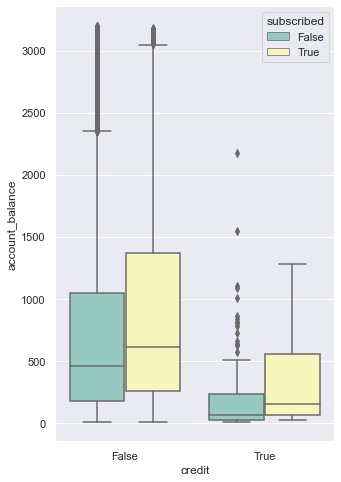

In [44]:
data_with_subscribed=data.copy()
data_with_subscribed['subscribed']=target
data_with_subscribed= data_with_subscribed[data_with_subscribed['account_balance'].between(quartiles_table['account_balance'].iat[1], quartiles_table['account_balance'].iat[5], inclusive=False) ]
sns.set(rc={'figure.figsize':(5,8)})
sns.boxplot(y="account_balance", x="credit", hue= "subscribed", data=data_with_subscribed, palette="Set3")

<AxesSubplot:xlabel='status', ylabel='age'>

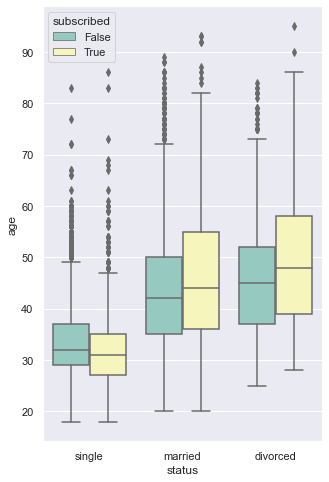

In [45]:
data_with_subscribed=data.copy()
data_with_subscribed['subscribed']=target
sns.set(rc={'figure.figsize':(5,8)})
sns.boxplot(y="age", x="status", hue= "subscribed", data=data_with_subscribed, palette="Set3")

#### add new column, the name of the new column is p_participant:
this column is based on the columns: 'p_outcome', 'p_days' ,'n_p_contact'.
the value True in this column means the person participated in one of the previous campaigns
and False means he did not participate.

-when the value in 'p_outcome' is not 'nan' ,'p_days' is not -1,and in 'n_p_contact'is not 0 ==> the value in p_participant will be True.

-when the value in 'p_outcome' is 'nan', in 'p_days' is -1 and in 'n_p_contact'is 0 ==> the value in p_participant will be False.

-otherwise the value is nan.

In [46]:
  data[data.isnull().sum(1)>3]

,status,age,n_child,education,profession,device,account_balance,loan,mortgage,credit,positive,n_contact,l_call_duration,p_outcome,n_p_contact,p_days,l_day,l_month
id,,,,,,,,,,,,,,,,,,
493836,single,38,NaN,NaN,accountant,NaN,66,False,False,False,True,1,193,NaN,0,-1,19,6
525453,single,27,NaN,NaN,NaN,cellular,303,False,False,False,True,1,295,NaN,0,-1,22,2
491702,single,39,NaN,master,NaN,NaN,10,False,False,False,True,1,171,NaN,0,-1,6,6
489347,single,51,NaN,NaN,manager,NaN,-405,False,True,False,False,2,32,NaN,0,-1,28,5
490765,divorced,54,NaN,NaN,engineer,NaN,1401,False,True,False,True,2,135,NaN,0,-1,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488509,married,45,NaN,NaN,scientist,NaN,436,False,True,False,True,1,134,NaN,0,-1,27,5
482572,single,39,NaN,NaN,teacher,NaN,241,False,True,False,True,1,369,NaN,0,-1,5,5
489198,single,41,NaN,NaN,engineer,NaN,2562,False,True,False,True,1,50,NaN,0,-1,28,5


In [47]:
def create_p_participant(data):
    conditions = [
        ((pd.isnull(data['p_outcome']) == False) & (data['p_days'] != -1) &(data['n_p_contact']!=0)),
        ((pd.isnull(data['p_outcome']) == True) & (data['p_days'] == -1) &(data['n_p_contact']==0)),
        #most of the variables are true so we fill the cell with value true
        ((pd.isnull(data['p_outcome']) == True) & (data['p_days'] != -1) &(data['n_p_contact']!=0)),    
        ]
    values = ['True','False','True']
    nan_rows=data[data.isnull().sum(axis=1)>3]
    data['p_participant'] = list(np.select(conditions, values, default=np.nan))
    return data['p_participant']

# create a new column and use np.select to assign values to it using our lists as arguments
data['p_participant'] = create_p_participant(data)
nom_data['p_participant'] = data['p_participant'] 
df['p_participant'] = data['p_participant'] 
df['p_participant'].value_counts()

X_valid['p_participant'] = create_p_participant(X_valid)

In [48]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6104 entries, 507697 to 492126
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   status           6104 non-null   object
 1   age              6104 non-null   int64 
 2   n_child          2105 non-null   object
 3   education        5859 non-null   object
 4   profession       6060 non-null   object
 5   device           4320 non-null   object
 6   account_balance  6104 non-null   int64 
 7   loan             6104 non-null   bool  
 8   mortgage         6104 non-null   bool  
 9   credit           6104 non-null   bool  
 10  positive         6104 non-null   bool  
 11  n_contact        6104 non-null   int64 
 12  l_call_duration  6104 non-null   int64 
 13  p_outcome        1089 non-null   object
 14  n_p_contact      6104 non-null   int64 
 15  p_days           6104 non-null   int64 
 16  subscribed       6104 non-null   bool  
 17  l_day            6104 non-

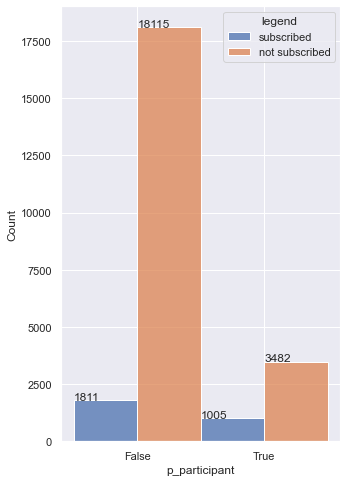

In [49]:
check_p_outcome=df.copy()[['p_participant','subscribed']]
#selecting p_outcome values in which the value is not unknown
check_p_outcome=check_p_outcome.loc[check_p_outcome['p_participant']!='unknown']
x=check_p_outcome.loc[check_p_outcome['subscribed']]['p_participant']
y=check_p_outcome.loc[check_p_outcome['subscribed']==False]['p_participant']
check_p_subscribed=pd.concat(axis=0, ignore_index=True, objs=[
    pd.DataFrame.from_dict({'p_participant': x, 'legend': 'subscribed'}),
    pd.DataFrame.from_dict({'p_participant': y, 'legend': 'not subscribed'})
])
fig, ax = plt.subplots()
sns.histplot(data=check_p_subscribed, x='p_participant', hue='legend', multiple='dodge', ax=ax)
for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height())) # adding height of column


## attributes correlations: 

#### correlation matrix only the numaric values:

<AxesSubplot:>

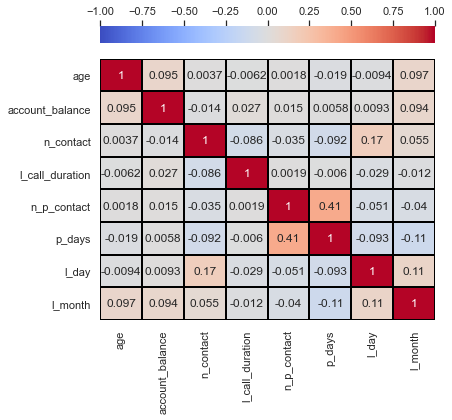

In [50]:
num_corr=num_data.copy()
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(num_corr.corr(method = 'pearson'), annot = True, vmin=-1, vmax=1, center= 0,ax=ax,
            cmap= 'coolwarm', linewidths=1, linecolor='black', cbar_kws= dict(use_gridspec=False,location="top"))

#### correlation matrix of all the atributtes numaric values:
adjust Categorical data  before calculating the correlation.

In [51]:
data_corr=data.copy()
#adding col of subscribed into data_corr
data_corr['subscribed']=target
#nom_data.drop('l_day',axis='columns', inplace=True)
for col in nom_data.columns:
    if data_corr[col].dtypes!=bool:
        data_corr[col+'_cat'] = data_corr[col].astype('category').cat.codes

In [52]:
data_corr=data_corr.corr(method = 'pearson')


Visualization of the correlation matrix

<AxesSubplot:>

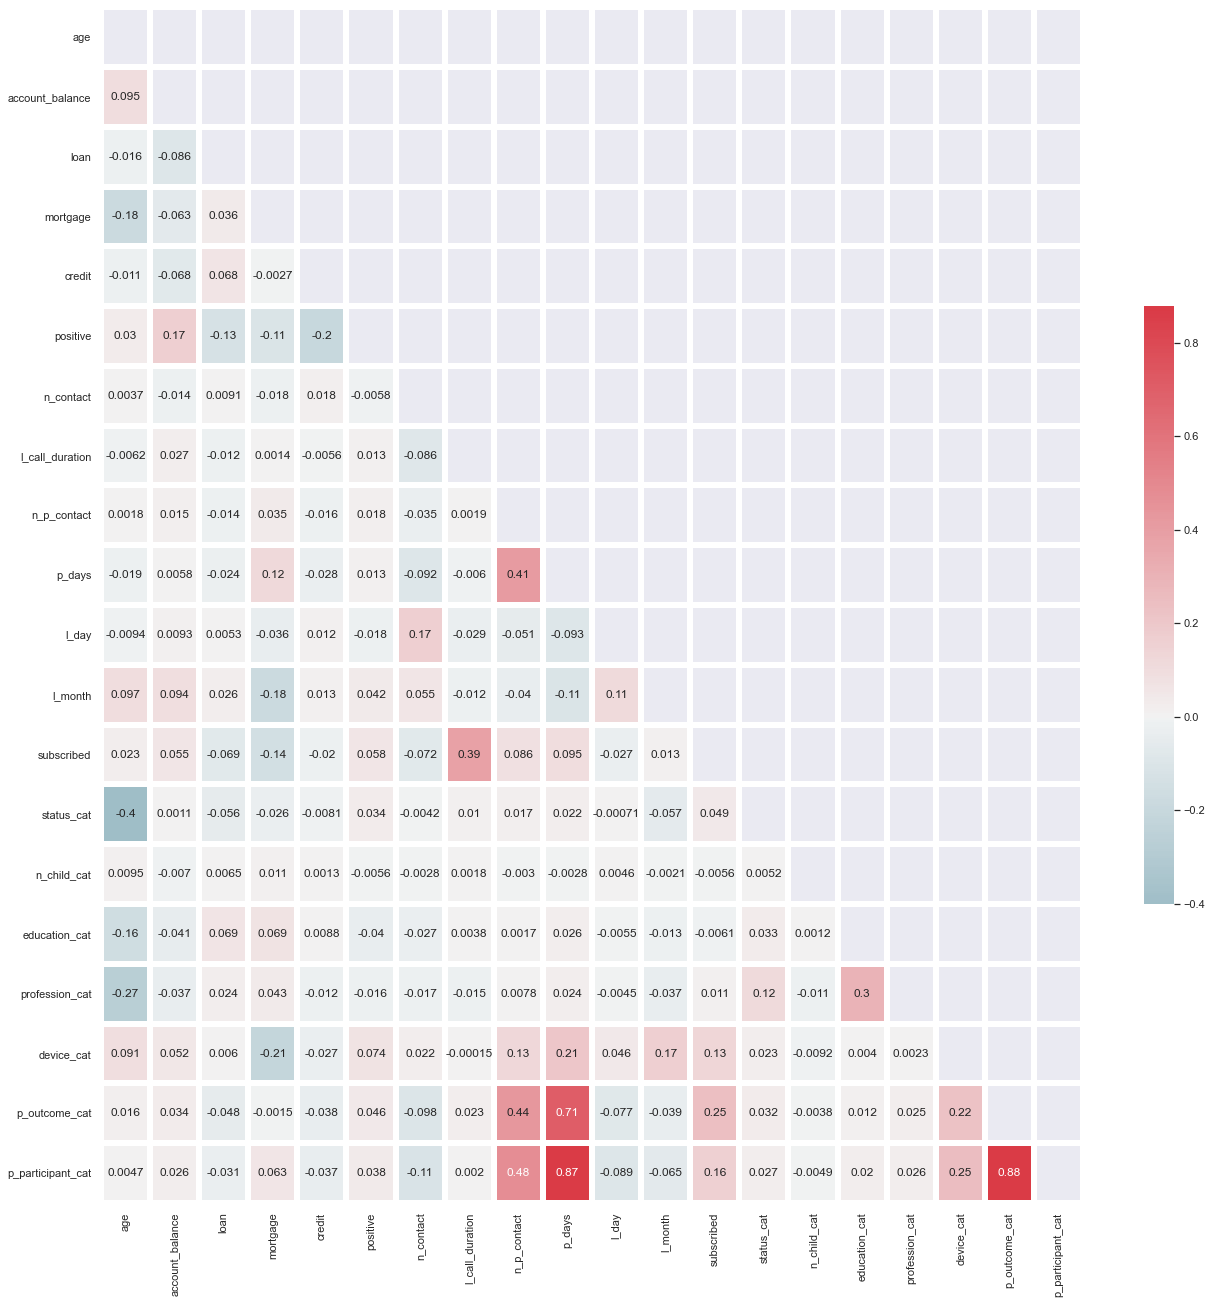

In [53]:
# Generate a mask for the upper triangle
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 22))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data_corr, mask=mask, cmap=cmap, center=0,annot=True, linewidths=5, cbar_kws={"shrink": 0.5})

### Remove n_child column:
First off all n_child coulmn has more than 50% missing values. More over, from the bars graph of n_child vs subscribes we saw that n_child columns does not give us new information. Now from the correlation matrix we see that n_child correlation with each one of the atributtes is very close to zero.
Because of it we understand that n_child columns is not informative column and we choose to delete it.
for this part of the project we consider contactions only between to atributes this colomuns is not useful ,not for using it to fill other atributtes and not for filling missing values in it.But maybe in the next parts it will be useful so we will keep it in the df.

In [54]:
data.drop('n_child',axis='columns', inplace=True)
nom_data.drop('n_child',axis='columns', inplace=True)

df.drop('n_child',axis='columns', inplace=True)
X_valid.drop('n_child',axis='columns', inplace=True)



#### Scatters according to conection we observed in the correlation matrix

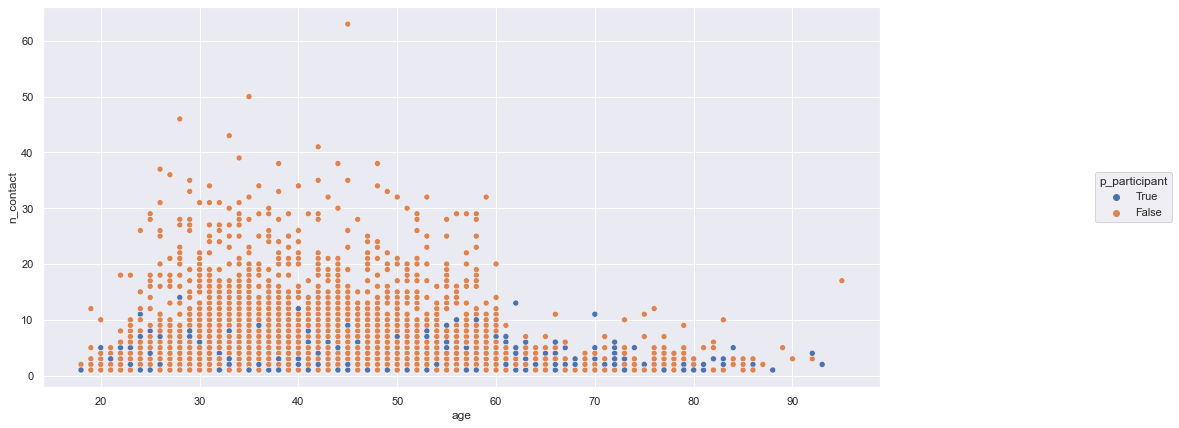

In [55]:
fig, ax = plt.subplots(figsize=(15,7))
nbins=30
g=sns.scatterplot(x="age", y="n_contact", data=data, hue="p_participant")
g.legend(title='p_participant', loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

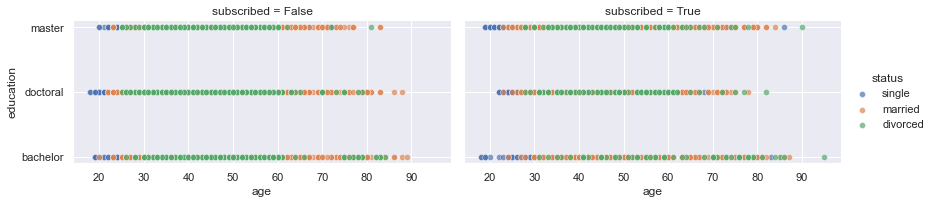

In [56]:
data_with_subcribed['account_balance'] = data['account_balance'][num_data['account_balance'].between(quartiles_table['account_balance'].iat[1], quartiles_table['account_balance'].iat[5], inclusive=False) ]
g = sns.FacetGrid(data_with_subcribed, col="subscribed", hue="status", height=3, aspect=2)
g.map(sns.scatterplot, "age", "education", alpha=.7)
g.add_legend()

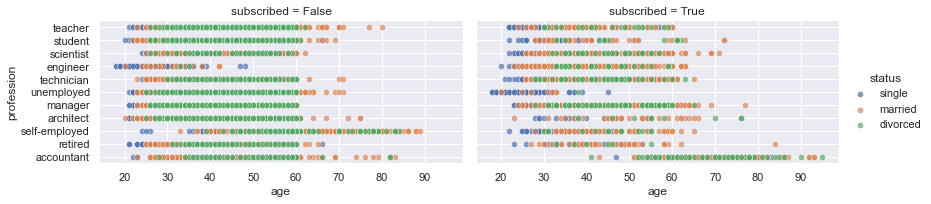

In [57]:
data_with_subcribed=data.copy()
data_with_subcribed['subscribed']=target
#sns.scatterplot(x="account_balance", y="crdit", data=data, hue="positive")
g = sns.FacetGrid(data_with_subcribed, col="subscribed", hue="status", height=3, aspect=2)
g.map(sns.scatterplot, "age", "profession", alpha=.7)
g.add_legend()

## Organizing the data before filling missing values

adding columns of the season according l_month:
winter-0 includes: Dec-12,Jan-1,Feb-2
spring-1 includes: Mar-3,Apr-4,May-5
summer-2 includes: Jun-6,Jul-7,Aug-8
fall-3 includes Sep-9,Oct-10,Nov-11

In [58]:
df.loc[ (df['l_month']==12)|(df['l_month']==1)|(df['l_month']==2), 'l_season'] = 0 #winter
df.loc[(df['l_month']==3)|(df['l_month']==4)|(df['l_month']==5), 'l_season'] = 1 #spring
df.loc[(df['l_month']==6)|(df['l_month']==7)|(df['l_month']==8), 'l_season'] = 2 #summer
df.loc[(df['l_month']==9)|(df['l_month']==10)|(df['l_month']==11), 'l_season'] = 3 #fall

X_valid.loc[ (X_valid['l_month']==12)|(X_valid['l_month']==1)|(X_valid['l_month']==2), 'l_season'] = 0 #winter
X_valid.loc[(X_valid['l_month']==3)|(X_valid['l_month']==4)|(X_valid['l_month']==5), 'l_season'] = 1 #spring
X_valid.loc[(X_valid['l_month']==6)|(X_valid['l_month']==7)|(X_valid['l_month']==8), 'l_season'] = 2 #summer
X_valid.loc[(X_valid['l_month']==9)|(X_valid['l_month']==10)|(X_valid['l_month']==11), 'l_season'] = 3 #fall

In [59]:
df['l_season']=df['l_season'].astype('int64')
data['l_season']=df['l_season'].astype('int64')
X_valid['l_season']=X_valid['l_season'].astype('int64')

df=df.drop('l_month',axis='columns')
data=data.drop('l_month',axis='columns')
X_valid=X_valid.drop('l_month',axis='columns')

adding colunmn of 'debts' which indicates the number of  debts the person has.
this column sums the following debts: loan,mortgage,credit,positive

*positive is 1 while the account balanse is positive because we sum the debts
which means we want to consider debt when the account balance is negative we will sum (1-df['positive']) 

In [60]:
df['debts']=df['loan'].astype(int)+df['mortgage'].astype(int)+df['credit'].astype(int)+(1-df['positive'].astype(int))
data['debts']=data['loan'].astype(int)+data['mortgage'].astype(int)+data['credit'].astype(int)+(1-data['positive'].astype(int))

X_valid['debts']=X_valid['loan'].astype(int)+X_valid['mortgage'].astype(int)+X_valid['credit'].astype(int)+(1-X_valid['positive'].astype(int))

In [61]:
X_valid['debts'].value_counts()

1    2904
0    2252
2     822
3     118
4       8
Name: debts, dtype: int64

change numeric values into z_norm:

In [62]:
def add_z_norm(data):
    numeric=data.select_dtypes(exclude=['object','bool'])
    for col in numeric.columns:
            z_scaler = StandardScaler()
            z_scaler.fit(pd.DataFrame(data[col]))
            data[col+'_z_norm'] = z_scaler.transform(pd.DataFrame(data[col]))
    return data

valid_z_norm=pd.concat([data,X_valid.drop(columns='subscribed')],axis=0)
valid_z_norm=add_z_norm(valid_z_norm)
numeric=X_valid.select_dtypes(exclude=['object','bool'])
for col in numeric.columns:
    X_valid[col+'_z_norm'] = valid_z_norm[col+'_z_norm'].loc[X_valid.index]

df=add_z_norm(df)
data=add_z_norm(data)


In [63]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6104 entries, 507697 to 492126
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   status                  6104 non-null   object 
 1   age                     6104 non-null   int64  
 2   education               5859 non-null   object 
 3   profession              6060 non-null   object 
 4   device                  4320 non-null   object 
 5   account_balance         6104 non-null   int64  
 6   loan                    6104 non-null   bool   
 7   mortgage                6104 non-null   bool   
 8   credit                  6104 non-null   bool   
 9   positive                6104 non-null   bool   
 10  n_contact               6104 non-null   int64  
 11  l_call_duration         6104 non-null   int64  
 12  p_outcome               1089 non-null   object 
 13  n_p_contact             6104 non-null   int64  
 14  p_days                  6104 non-

# Missing Values:

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24413 entries, 527515 to 489969
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   status                  24413 non-null  object 
 1   age                     24413 non-null  int64  
 2   education               23414 non-null  object 
 3   profession              24264 non-null  object 
 4   device                  17326 non-null  object 
 5   account_balance         24413 non-null  int64  
 6   loan                    24413 non-null  bool   
 7   mortgage                24413 non-null  bool   
 8   credit                  24413 non-null  bool   
 9   positive                24413 non-null  bool   
 10  n_contact               24413 non-null  int64  
 11  l_call_duration         24413 non-null  int64  
 12  p_outcome               4485 non-null   object 
 13  n_p_contact             24413 non-null  int64  
 14  p_days                  24413 no

In [65]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6104 entries, 507697 to 492126
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   status                  6104 non-null   object 
 1   age                     6104 non-null   int64  
 2   education               5859 non-null   object 
 3   profession              6060 non-null   object 
 4   device                  4320 non-null   object 
 5   account_balance         6104 non-null   int64  
 6   loan                    6104 non-null   bool   
 7   mortgage                6104 non-null   bool   
 8   credit                  6104 non-null   bool   
 9   positive                6104 non-null   bool   
 10  n_contact               6104 non-null   int64  
 11  l_call_duration         6104 non-null   int64  
 12  p_outcome               1089 non-null   object 
 13  n_p_contact             6104 non-null   int64  
 14  p_days                  6104 non-

we have 4 atributtes with missing values: education, profession,device,p_outcome.
we will not complete the p_outcome missing values because there are more than 80% of missing values. we still keep this columns because of the high correlation with the target value.

check if there are rows with too much missing data:

In [66]:
nan_rows=data[data.isnull().sum(axis=1)>3]
nan_rows.shape[0] #checking the number of rows with 4 nan

33

as we can see there are 40 people with 4 nan attrubutes so its not informetive there for we can delete them

In [67]:
data = data.drop(labels=nan_rows.index, axis=0)
df = df.drop(labels=nan_rows.index, axis=0)

## device

###  Filling missing values by exploring correlations. 

There is a correlation with 'p_participant',
therefore it is an option to divide into three groups conforming to this attribute
and in each group complete the value according to the most common value.

In [68]:
device_corr = data['device']
for i in df['p_participant'].unique():
    #data.loc[df['p_participant']==i , 'device_complete'] = data['device_complete'][data['p_participant']==i].fillna(value=data['device_complete'][data['p_participant']==i].value_counts().index[0])
    print("For class ", i, " the most common value is ", data.loc[df['p_participant']==i , 'device'].value_counts().index[0])

For class  True  the most common value is  cellular
For class  False  the most common value is  cellular


as we saw the correlation method complete the same value in each group. so we can complete the missing value just according the most common value in 'device' atribute which is 'cellular'.

###  Filling missing values by the most common value

In [69]:
data['device']=data['device'].fillna(value='cellular')
df['device']=data['device']

In [70]:
X_valid['device'].value_counts()

cellular     3915
telephone     405
Name: device, dtype: int64

In [71]:
X_valid['device']=X_valid['device'].fillna(value='cellular')

## Profession:

### split the data into two dataframe  of p_participant=True and p_participant=False
and then split according to dtype before implement distances

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24380 entries, 527515 to 489969
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   status                  24380 non-null  object 
 1   age                     24380 non-null  int64  
 2   education               23414 non-null  object 
 3   profession              24264 non-null  object 
 4   device                  24380 non-null  object 
 5   account_balance         24380 non-null  int64  
 6   loan                    24380 non-null  bool   
 7   mortgage                24380 non-null  bool   
 8   credit                  24380 non-null  bool   
 9   positive                24380 non-null  bool   
 10  n_contact               24380 non-null  int64  
 11  l_call_duration         24380 non-null  int64  
 12  p_outcome               4485 non-null   object 
 13  n_p_contact             24380 non-null  int64  
 14  p_days                  24380 no

In [73]:
def split_data(data_miss):

    data_participant=data_miss.loc[data_miss['p_participant']=='True']
    data_not_participant=data_miss.loc[data_miss['p_participant']!='True']

    #delete from data_not_participant 3 columns that always nan
    data_not_participant=data_not_participant.drop(columns=['p_days','p_outcome','n_p_contact','n_p_contact_z_norm','p_days_z_norm'])
    for col in data_participant.select_dtypes(exclude=['object','bool']):
        if col.find('z_norm')==-1:
                data_participant=data_participant.drop(columns=col)

    for col in data_not_participant.select_dtypes(exclude=['object','bool']):
        if col.find('z_norm')==-1:
                data_not_participant=data_not_participant.drop(columns=col)
   
    return data_participant,data_not_participant

data_participant,data_not_participant=split_data(data)


X_valid_participant,X_valid_not_participant=split_data(X_valid)
X_valid_participant=X_valid_participant.drop(columns='subscribed')
X_valid_not_participant=X_valid_not_participant.drop(columns='subscribed')

###  fill the missing values by distance:
##### checking the columns with missing values and handling them because we cant fill missing data by using atributtes with missing data


In [74]:
data_participant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4487 entries, 527515 to 510676
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   status                  4487 non-null   object 
 1   education               4324 non-null   object 
 2   profession              4471 non-null   object 
 3   device                  4487 non-null   object 
 4   loan                    4487 non-null   bool   
 5   mortgage                4487 non-null   bool   
 6   credit                  4487 non-null   bool   
 7   positive                4487 non-null   bool   
 8   p_outcome               4485 non-null   object 
 9   p_participant           4487 non-null   object 
 10  age_z_norm              4487 non-null   float64
 11  account_balance_z_norm  4487 non-null   float64
 12  n_contact_z_norm        4487 non-null   float64
 13  l_call_duration_z_norm  4487 non-null   float64
 14  n_p_contact_z_norm      4487 non-

In [75]:
data_not_participant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19893 entries, 491721 to 489969
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   status                  19893 non-null  object 
 1   education               19090 non-null  object 
 2   profession              19793 non-null  object 
 3   device                  19893 non-null  object 
 4   loan                    19893 non-null  bool   
 5   mortgage                19893 non-null  bool   
 6   credit                  19893 non-null  bool   
 7   positive                19893 non-null  bool   
 8   p_participant           19893 non-null  object 
 9   age_z_norm              19893 non-null  float64
 10  account_balance_z_norm  19893 non-null  float64
 11  n_contact_z_norm        19893 non-null  float64
 12  l_call_duration_z_norm  19893 non-null  float64
 13  l_day_z_norm            19893 non-null  float64
 14  l_season_z_norm         19893 no

In [76]:
#education is the only atributtes that includes nan in data_not_participant so we ignore it when we calculate the distances
data_not_participant_prof=data_not_participant.drop(columns='education')
data_participant_prof=data_participant.drop(columns='education') 

X_valid_participant_prof=X_valid_participant.drop(columns=['education'])
X_valid_not_participant_prof=X_valid_not_participant.drop(columns=['education']) 


education is the only ordinal atributte (we can rank its values:0-bachelor 1-master, 2-doctoral )  from the nominal atributtes.
because we cant fill profession missing value according to education we dont need to saperate the nominal table into categories and ordinal 
before calculating distance.

##### calculate distance:
the distance considers both nomnial and numrical attributes

the numerical attributes distance is calculated by euclidean metric and the categorial by hamming.


In [77]:
# dist_matrix function gets two tables and calculates the distance between each feature in the first table and all the features in the second table
#the function returns table of distances
def dist_matrix(data_miss,data_exist):
    ary_num = scipy.spatial.distance.cdist(data_miss.select_dtypes(include=['float64']), data_exist.select_dtypes(include=['float64']), metric='euclidean')
    data_miss_nomnial=data_miss.select_dtypes(exclude=['float64']).to_numpy()
    data_exist_nomnial=data_exist.select_dtypes(exclude=['float64']).to_numpy()
    ary_nom=np.zeros(ary_num.shape)
    
    for i in range(len(data_miss_nomnial)):
        for j in range(len(data_exist_nomnial)):
            ary_nom[i,j]= distance.hamming(data_miss_nomnial[i],data_exist_nomnial[j])
            
    mat_dist= ary_num+ary_nom
    return mat_dist

filling missing values in data_participant table:

In [78]:
def fill_proff_participant(data_participant_prof,data_participant):
    prof_miss = data_participant_prof[data_participant_prof['profession'].isnull()].drop(columns='profession')
    prof_exist = data_participant_prof[data_participant_prof['profession'].notnull()].drop(columns='profession')
    mat_dist= dist_matrix(prof_miss,prof_exist)

    data_participant['prof_comp'] = data_participant['profession']
    for i,j in enumerate(prof_miss.index):
        data_participant.loc[j,'prof_comp'] = data_participant.loc[prof_exist[mat_dist[i]==mat_dist[i].min()].index]['profession'].value_counts().index[0]


    data_participant['profession']=data_participant['prof_comp']
    data_participant=data_participant.drop(columns='prof_comp')
    return data_participant

In [79]:
data_participant=fill_proff_participant(data_participant_prof,data_participant)

In [80]:
all_data_participant_prof=pd.concat([data_participant_prof,X_valid_participant_prof],axis=0)
all_data_participant=pd.concat([data_participant,X_valid_participant],axis=0)
all_data_participant=fill_proff_participant(all_data_participant_prof,all_data_participant)


In [81]:
def fill_proff_not_participant(data_not_participant_prof,data_not_participant):
    prof_miss = data_not_participant_prof[data_not_participant_prof['profession'].isnull()].drop(columns='profession')
    prof_exist = data_not_participant_prof[data_not_participant_prof['profession'].notnull()].drop(columns='profession')
    mat_dist= dist_matrix(prof_miss,prof_exist)

    data_not_participant['prof_comp'] = data_not_participant['profession']
    for i,j in enumerate(prof_miss.index):
        data_not_participant.loc[j,'prof_comp'] = data_not_participant.loc[prof_exist[mat_dist[i]==mat_dist[i].min()].index]['profession'].value_counts().index[0]

    data_not_participant['profession']=data_not_participant['prof_comp']
    data_not_participant=data_not_participant.drop(columns='prof_comp')
    return data_not_participant

In [82]:
data_not_participant=fill_proff_not_participant(data_not_participant_prof,data_not_participant)

In [83]:
#all_data_not_participantx=fill_proff_participant(all_data_not_participant_prof,all_data_not_participant)
all_data_not_participant_prof=pd.concat([data_not_participant_prof,X_valid_not_participant_prof],axis=0)
all_data_not_participant=pd.concat([data_not_participant,X_valid_not_participant],axis=0)
all_data_not_participant=fill_proff_participant(all_data_not_participant_prof,all_data_not_participant)

In [84]:
#fill both not participant and participant misssing values in data table
data['profession'].loc[data_not_participant.index] = data_not_participant['profession']
data['profession'].loc[data_participant.index] = data_participant['profession']
df['profession'].loc[df.index]=data['profession']

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [85]:
X_valid['profession'].loc[X_valid_not_participant.index] = all_data_not_participant['profession']
X_valid['profession'].loc[X_valid_participant.index] = all_data_participant['profession']

In [86]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6104 entries, 507697 to 492126
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   status                  6104 non-null   object 
 1   age                     6104 non-null   int64  
 2   education               5859 non-null   object 
 3   profession              6104 non-null   object 
 4   device                  6104 non-null   object 
 5   account_balance         6104 non-null   int64  
 6   loan                    6104 non-null   bool   
 7   mortgage                6104 non-null   bool   
 8   credit                  6104 non-null   bool   
 9   positive                6104 non-null   bool   
 10  n_contact               6104 non-null   int64  
 11  l_call_duration         6104 non-null   int64  
 12  p_outcome               1089 non-null   object 
 13  n_p_contact             6104 non-null   int64  
 14  p_days                  6104 non-

## Education:

we will fill education missing values by distance. now we wont split data_miss table by p_participant atributtes.
in addition, we calculate the weight of each distance and than find group of 30 people with the most bigger weight. in this group we will find the most common value and fill the missing value by it.

In [87]:
data_miss_educ=data[['status', 'education', 'profession', 'device',
                   'loan', 'mortgage', 'credit', 'positive', 'p_participant','age_z_norm',
                   'account_balance_z_norm', 'n_contact_z_norm', 'l_call_duration_z_norm','l_day_z_norm',
                   'l_season_z_norm', 'debts_z_norm']]

In [88]:
def fill_educ(data_miss_educ):
    educ_miss = data_miss_educ[data_miss_educ['education'].isnull()].drop(columns='education')
    educ_exist = data_miss_educ[data_miss_educ['education'].notnull()].drop(columns='education')
    mat= dist_matrix(educ_miss,educ_exist)
    mat=np.exp(mat*(-1)) #w(d)=exp^(-d)
    data_miss_educ['educ_comp'] = data_miss_educ['education'].copy()
    for i,j in enumerate(educ_miss.index):
            thershold=mat[i][np.argsort(mat[i])[-30:][1]]
            data_miss_educ.loc[j,'educ_comp'] = data_miss_educ.loc[educ_exist[mat[i]>=thershold].index]['education'].value_counts().index[0]
    data_miss_educ['education']=data_miss_educ['educ_comp'].copy()
    data_miss_educ=data_miss_educ.drop(columns='educ_comp')
    return data_miss_educ

In [89]:
data_miss_educ=fill_educ(data_miss_educ)

<ipython-input-88-09714bc90831>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_miss_educ['educ_comp'] = data_miss_educ['education'].copy()
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
<ipython-input-88-09714bc90831>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [90]:
X_valid_miss_educ=X_valid[['status', 'education', 'profession', 'device',
                   'loan', 'mortgage', 'credit', 'positive', 'p_participant','age_z_norm',
                   'account_balance_z_norm', 'n_contact_z_norm', 'l_call_duration_z_norm','l_day_z_norm',
                   'l_season_z_norm', 'debts_z_norm']]

In [91]:
all_data=pd.concat([data_miss_educ,X_valid_miss_educ],axis=0)
all_data=fill_educ(all_data)


In [92]:
data['education'].loc[data_miss_educ.index] = data_miss_educ['education']
df['education']=data['education']
X_valid['education'].loc[X_valid.index] = all_data['education']
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6104 entries, 507697 to 492126
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   status                  6104 non-null   object 
 1   age                     6104 non-null   int64  
 2   education               6104 non-null   object 
 3   profession              6104 non-null   object 
 4   device                  6104 non-null   object 
 5   account_balance         6104 non-null   int64  
 6   loan                    6104 non-null   bool   
 7   mortgage                6104 non-null   bool   
 8   credit                  6104 non-null   bool   
 9   positive                6104 non-null   bool   
 10  n_contact               6104 non-null   int64  
 11  l_call_duration         6104 non-null   int64  
 12  p_outcome               1089 non-null   object 
 13  n_p_contact             6104 non-null   int64  
 14  p_days                  6104 non-

## Outlier

first we will normalize the numeric data by Z-score normalization Change the data to be with 0 mean and variance 1
and also show the outlier in each numeric category

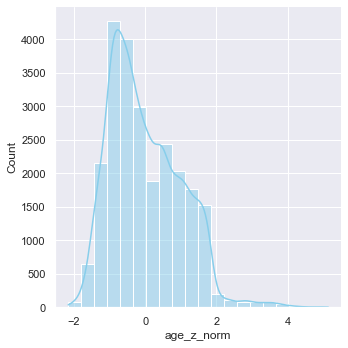

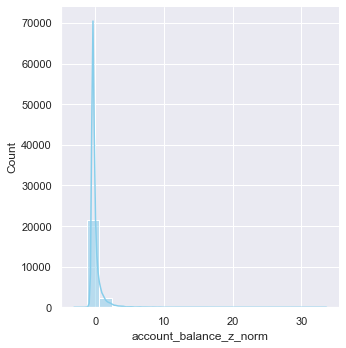

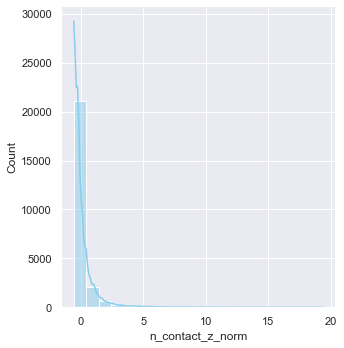

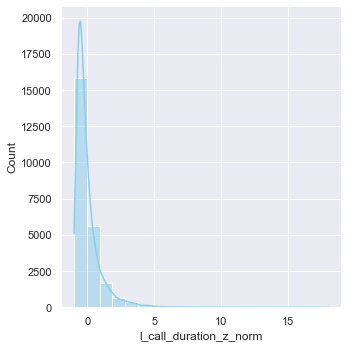

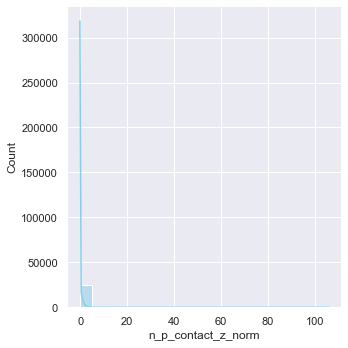

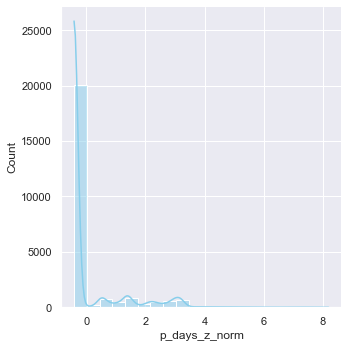

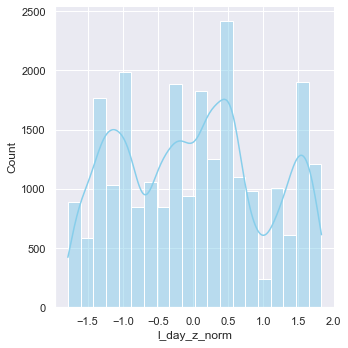

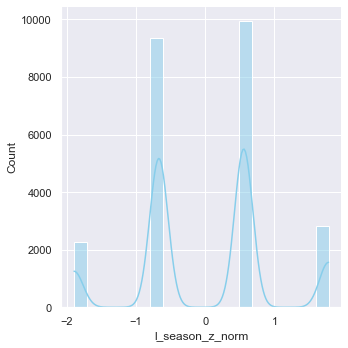

In [93]:
numeric_df=df.select_dtypes(include=['int64'])
for col in numeric_df.columns:
    z_scaler = StandardScaler()
    z_scaler.fit(pd.DataFrame(df[col]))
    df[col+'_z_norm'] = z_scaler.transform(pd.DataFrame(df[col]))
    sns.displot(df[col+'_z_norm'], bins=20, kde=True, color='skyblue')
    

In [94]:
for col in numeric_df.columns:
    data_outlier = df[col+'_z_norm']
    data_mean, data_std = np.mean(data_outlier), np.std(data_outlier)
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outlier=df.loc[(df[col+'_z_norm'] > upper) | (df[col+'_z_norm'] < lower)]
    print('outlier of:',col+'_z_norm')
    

outlier of: age_z_norm
outlier of: account_balance_z_norm
outlier of: n_contact_z_norm
outlier of: l_call_duration_z_norm
outlier of: n_p_contact_z_norm
outlier of: p_days_z_norm
outlier of: l_day_z_norm
outlier of: l_season_z_norm


## PCA:

In [95]:
df_pca =df.copy()
df_pca=df_pca.select_dtypes(exclude=['float64'])
df_cat =df_pca.select_dtypes(include=['object'])
for col in df_cat.columns:
    df_pca[col] = df_pca[col].astype('category').cat.codes  
df_pca #on thos data we will compute the PCA

,status,age,education,profession,device,account_balance,loan,mortgage,credit,positive,n_contact,l_call_duration,p_outcome,n_p_contact,p_days,subscribed,l_day,p_participant,l_season,debts
id,,,,,,,,,,,,,,,,,,,,
527515,2,47,1,3,0,290,True,True,False,True,3,232,0,2,378,False,9,1,3,2
491721,1,44,2,9,0,233,False,False,False,True,1,18,3,0,-1,False,6,0,2,0
524298,1,92,0,0,0,708,False,False,False,True,3,284,3,0,-1,True,22,0,3,0
509981,2,36,2,9,0,10,False,True,False,True,2,127,3,0,-1,False,21,0,3,1
498731,0,33,2,8,0,50,True,False,False,True,1,478,3,0,-1,True,23,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491452,1,56,0,2,0,195,False,False,False,True,1,286,3,0,-1,False,5,0,2,0
511418,2,34,2,2,0,177,False,False,False,True,1,310,3,0,-1,False,2,0,0,0
510676,2,32,2,2,1,154,False,True,False,True,1,45,0,1,265,False,29,1,0,1


In [96]:
 pca = PCA(n_components = 0.999, svd_solver = 'full') 
pca.fit(df_pca, y='subscribed')
df_pca = pd.DataFrame(pca.transform(df_pca))
df_pca

,0,1,2
0,-926.195305,-0.309007,337.263285
1,-983.790987,-212.858605,-42.417054
2,-508.138654,51.969190,-41.846340
3,-1206.532614,-103.341253,-42.093688
4,-1165.695578,247.560556,-40.903903
...,...,...,...
24375,-1021.146215,55.226972,-41.509821
24376,-1039.097136,79.281523,-41.352092
24377,-1062.671288,-186.605547,223.542748
24378,-1420.549620,-108.820438,-42.003375


In [97]:
pca.explained_variance_ratio_

array([0.99116897, 0.00739761, 0.00140551])

# Pre Processing  the test data:

In [98]:
test = pd.read_csv("./marketing_campaigns_test.csv", index_col=0)

In [99]:
test=test.replace("unknown", np.nan)

In [100]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14694 entries, 512496 to 487062
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   status           14694 non-null  object
 1   age              14694 non-null  int64 
 2   n_child          4962 non-null   object
 3   education        14081 non-null  object
 4   profession       14599 non-null  object
 5   device           10545 non-null  object
 6   account_balance  14694 non-null  int64 
 7   loan             14694 non-null  bool  
 8   mortgage         14694 non-null  bool  
 9   credit           14694 non-null  bool  
 10  positive         14694 non-null  bool  
 11  campaign_type    14694 non-null  object
 12  n_contact        14694 non-null  int64 
 13  l_date           14694 non-null  object
 14  l_call_duration  14694 non-null  int64 
 15  p_outcome        2678 non-null   object
 16  n_p_contact      14694 non-null  int64 
 17  p_days           14694 no

delete 'campaign_type','n_child' columns:

In [101]:
test=test.drop(columns=['campaign_type','n_child'])

add 'l_season' column and delete 'l_month' column:

In [102]:
test[['l_day','l_month']] = (test['l_date'].str).split('-', 1, expand=True)
test.drop('l_date',axis=1, inplace=True)

test['l_day']=test['l_day'].astype('int64')

months_in_year = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
counter = 1
l_month_column = pd.DataFrame(test['l_month'].copy())
for month in months_in_year:
    l_month_column = l_month_column.replace(str(month), counter)
    counter = counter + 1
    
test['l_month'] = l_month_column

change 'l_month' column into 'l_season' column

In [103]:
test.loc[ (test['l_month']==12)|(test['l_month']==1)|(test['l_month']==2), 'l_season'] = 0 #winter
test.loc[(test['l_month']==3)|(test['l_month']==4)|(test['l_month']==5), 'l_season'] = 1 #spring
test.loc[(test['l_month']==6)|(test['l_month']==7)|(test['l_month']==8), 'l_season'] = 2 #summer
test.loc[(test['l_month']==9)|(test['l_month']==10)|(test['l_month']==11), 'l_season'] = 3 #fall

test['l_season']=test['l_season'].astype('int64')
test=test.drop('l_month',axis='columns')


In [104]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14694 entries, 512496 to 487062
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   status           14694 non-null  object
 1   age              14694 non-null  int64 
 2   education        14081 non-null  object
 3   profession       14599 non-null  object
 4   device           10545 non-null  object
 5   account_balance  14694 non-null  int64 
 6   loan             14694 non-null  bool  
 7   mortgage         14694 non-null  bool  
 8   credit           14694 non-null  bool  
 9   positive         14694 non-null  bool  
 10  n_contact        14694 non-null  int64 
 11  l_call_duration  14694 non-null  int64 
 12  p_outcome        2678 non-null   object
 13  n_p_contact      14694 non-null  int64 
 14  p_days           14694 non-null  int64 
 15  l_day            14694 non-null  int64 
 16  l_season         14694 non-null  int64 
dtypes: bool(4), int64(8), obj

create 'p_participant' column:

In [105]:
test['p_participant'] = create_p_participant(test)

add 'debts' column:

In [106]:
test['debts']=test['loan'].astype(int)+test['mortgage'].astype(int)+test['credit'].astype(int)+(1-test['positive'].astype(int))


In [107]:
test_z_norm=pd.concat([data.drop(columns=[ 'age_z_norm',
       'account_balance_z_norm', 'n_contact_z_norm', 'l_call_duration_z_norm',
       'n_p_contact_z_norm', 'p_days_z_norm', 'l_day_z_norm',
       'l_season_z_norm', 'debts_z_norm']),test],axis=0)
test_z_norm=add_z_norm(test_z_norm)
numeric=test.select_dtypes(exclude=['object','bool'])
for col in numeric.columns:
    test[col+'_z_norm'] = test_z_norm[col+'_z_norm'].loc[test.index]

In [108]:
test_z_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39074 entries, 527515 to 487062
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   status                  39074 non-null  object 
 1   age                     39074 non-null  int64  
 2   education               38461 non-null  object 
 3   profession              38979 non-null  object 
 4   device                  34925 non-null  object 
 5   account_balance         39074 non-null  int64  
 6   loan                    39074 non-null  bool   
 7   mortgage                39074 non-null  bool   
 8   credit                  39074 non-null  bool   
 9   positive                39074 non-null  bool   
 10  n_contact               39074 non-null  int64  
 11  l_call_duration         39074 non-null  int64  
 12  p_outcome               7163 non-null   object 
 13  n_p_contact             39074 non-null  int64  
 14  p_days                  39074 no

### Filling missing values:
<b>Device:</b> filling missing values by the most common value

In [109]:
test['device'].value_counts()

cellular     9567
telephone     978
Name: device, dtype: int64

In [110]:
test['device']=test['device'].fillna(value='cellular')

<b> Profession:</b>
<br>split the data into two dataframe  of p_participant=True and p_participant=False
<br>and then split according to dtype before implement distances

In [111]:
test_participant,test_not_participant=split_data(test)
data_participant,data_not_participant=split_data(data)#data=X_valid+X_train

In [112]:
test_participant_prof=test_participant.drop(columns='education')
test_not_participant_prof=test_not_participant.drop(columns='education') 

data_participant_prof=data_participant.drop(columns='education')
data_not_participant_prof=data_not_participant.drop(columns='education')

In [113]:
test_participant_prof.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2680 entries, 518919 to 515998
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   status                  2680 non-null   object 
 1   profession              2670 non-null   object 
 2   device                  2680 non-null   object 
 3   loan                    2680 non-null   bool   
 4   mortgage                2680 non-null   bool   
 5   credit                  2680 non-null   bool   
 6   positive                2680 non-null   bool   
 7   p_outcome               2678 non-null   object 
 8   p_participant           2680 non-null   object 
 9   age_z_norm              2680 non-null   float64
 10  account_balance_z_norm  2680 non-null   float64
 11  n_contact_z_norm        2680 non-null   float64
 12  l_call_duration_z_norm  2680 non-null   float64
 13  n_p_contact_z_norm      2680 non-null   float64
 14  p_days_z_norm           2680 non-

In [114]:
#fill test_participant:

all_participant_prof=pd.concat([data_participant_prof,test_participant_prof],axis=0)
all_participant=pd.concat([data_participant,test_participant],axis=0)
all_participant_fill=fill_proff_participant(all_participant_prof,all_participant)

In [115]:
#fill test_not_participant:

all_not_participant_prof=pd.concat([data_not_participant_prof,test_not_participant_prof],axis=0)
all_not_participant=pd.concat([data_not_participant,test_not_participant],axis=0)
all_not_participant_fill=fill_proff_participant(all_not_participant_prof,all_not_participant)

In [116]:
all_not_participant_fill['profession']

id 
491721    technician
524298    accountant
509981    technician
498731       teacher
522976       manager
             ...    
500044    accountant
527278      engineer
489057      engineer
496178       teacher
487062    accountant
Name: profession, Length: 31907, dtype: object

In [117]:
test['profession'].loc[test_not_participant.index] = all_not_participant_fill['profession']
test['profession'].loc[test_participant.index] = all_participant_fill['profession']

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<b>Educaion:<br></b>
fill education missing values by distance.<br>
we calculate the weight of each distance and than set a treshold value of weight to find all the distances with  weight which is bigger than the treshold. in this group we will find the most common value and fill the missing value by it.

In [118]:
test_miss_educ=test[['status', 'education', 'profession', 'device',
                   'loan', 'mortgage', 'credit', 'positive', 'p_participant','age_z_norm',
                   'account_balance_z_norm', 'n_contact_z_norm', 'l_call_duration_z_norm','l_day_z_norm',
                   'l_season_z_norm', 'debts_z_norm']]
data_miss_educ=data[['status', 'education', 'profession', 'device',
                   'loan', 'mortgage', 'credit', 'positive', 'p_participant','age_z_norm',
                   'account_balance_z_norm', 'n_contact_z_norm', 'l_call_duration_z_norm','l_day_z_norm',
                   'l_season_z_norm', 'debts_z_norm']]

all_data=pd.concat([data_miss_educ,test_miss_educ],axis=0)


In [119]:
all_data=fill_educ(all_data)

In [120]:
test['education'].loc[test.index] = all_data['education']
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14694 entries, 512496 to 487062
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   status                  14694 non-null  object 
 1   age                     14694 non-null  int64  
 2   education               14694 non-null  object 
 3   profession              14694 non-null  object 
 4   device                  14694 non-null  object 
 5   account_balance         14694 non-null  int64  
 6   loan                    14694 non-null  bool   
 7   mortgage                14694 non-null  bool   
 8   credit                  14694 non-null  bool   
 9   positive                14694 non-null  bool   
 10  n_contact               14694 non-null  int64  
 11  l_call_duration         14694 non-null  int64  
 12  p_outcome               2678 non-null   object 
 13  n_p_contact             14694 non-null  int64  
 14  p_days                  14694 no

## Final train,valid,test pre processing:

the tables include the new columns we created: p_participant,l_season,debts,l_day<br>
and without the columns we deleted: campaign_type,consent,n_child,l_date,l_month,p_outcome,n_p_contact,p_days'.

the numric data apears normelize according to  Z_norm,and divided into bins.<br>
the ctegories data apears by nomeric categories

* there are no missing values (except p_outcome that we decided not to fill )
 
df without the 40 rows with 4 missing values that we decided to delete and not complete


<b> add to the data base the bins columns of the numeric attributes we presented

function that categories the numeric columns into different groups.
<br><b>input:</b> N- number of groups we want to create,data- where the column we want to change exist column name- that name of the column in data we want to divide into bins</br>
<br><b>output:</b> the column with valuse divided to N groups.</br>

the division is into N groups with the same width according to the width of all the ages

In [121]:
def create_bins(N, col):
    age=pd.cut(col, N, labels=False, retbins=True, right=False)[0]
    age=age.to_frame(name=col.name)
    return age

In [122]:
#cols_dict is a dictionary in which the keys are the names of the columns that we want to change their values 
#the values of the keys is the number of bins that we want to split the columns
def change_cols_to_bins(cols_dict, data):
    for key in cols_dict.keys():
        data[key + '_bin'] = create_bins(cols_dict.get(key), data[key])
    return data

In [123]:
cols_dict = {'l_day': 3, 'account_balance': 3, 'age': 3, 'n_contact': 2 }
df=change_cols_to_bins(cols_dict,df)
X_valid=change_cols_to_bins(cols_dict,X_valid)
test=change_cols_to_bins(cols_dict,test)

In [124]:
def cat_duration(df):
    df.loc[df['l_call_duration'] <= 200, 'l_call_duration_bin'] = 0 
    df.loc[(df['l_call_duration'] > 200) & (df['l_call_duration'] <= 400), 'l_call_duration_bin'] = 1 
    df.loc[(df['l_call_duration'] > 400) & (df['l_call_duration'] <= 600), 'l_call_duration_bin'] = 2
    df.loc[(df['l_call_duration'] > 600) & (df['l_call_duration'] <= 800), 'l_call_duration_bin'] = 3
    df.loc[df['l_call_duration'] > 800, 'l_call_duration_bin'] = 4
    return df

df=cat_duration(df)
X_valid=cat_duration(X_valid)
test=cat_duration(test)

convert all the nomnial columns into numeric categories :

In [125]:
cat_col =['status', 'profession', 'device', 'loan', 'mortgage', 'credit', 'positive', 'p_participant', 'subscribed']

for col in cat_col:
    df[col]= df[col].astype('category').cat.codes
    X_valid[col]= X_valid[col].astype('category').cat.codes
    if col!='subscribed':
        test[col]= test[col].astype('category').cat.codes


convert the ordinal column - 'education' into numeric categories as follow: bachelor-1, master-2,doctoral-3

In [126]:
X_valid['education'] = X_valid['education'].replace(['bachelor','master','doctoral'],[0,1,2])
df['education'] = df['education'].replace(['bachelor','master','doctoral'],[0,1,2])
test['education'] = test['education'].replace(['bachelor','master','doctoral'],[0,1,2])

In [127]:
test=test.drop(columns=['p_outcome','n_p_contact','n_p_contact_z_norm','p_days','p_days_z_norm','l_day','account_balance','age','n_contact','l_call_duration'])
df=df.drop(columns=['p_outcome','n_p_contact','p_days','p_days_z_norm','l_day','account_balance','age','n_contact','l_call_duration'])
X_valid=X_valid.drop(columns=['p_outcome','n_p_contact','n_p_contact_z_norm','p_days','p_days_z_norm','l_day','account_balance','age','n_contact','l_call_duration'])

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24380 entries, 527515 to 489969
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   status                  24380 non-null  int8   
 1   education               24380 non-null  int64  
 2   profession              24380 non-null  int8   
 3   device                  24380 non-null  int8   
 4   loan                    24380 non-null  int8   
 5   mortgage                24380 non-null  int8   
 6   credit                  24380 non-null  int8   
 7   positive                24380 non-null  int8   
 8   subscribed              24380 non-null  int8   
 9   p_participant           24380 non-null  int8   
 10  l_season                24380 non-null  int64  
 11  debts                   24380 non-null  int32  
 12  age_z_norm              24380 non-null  float64
 13  account_balance_z_norm  24380 non-null  float64
 14  n_contact_z_norm        24380 no

In [129]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6104 entries, 507697 to 492126
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   status                  6104 non-null   int8   
 1   education               6104 non-null   int64  
 2   profession              6104 non-null   int8   
 3   device                  6104 non-null   int8   
 4   loan                    6104 non-null   int8   
 5   mortgage                6104 non-null   int8   
 6   credit                  6104 non-null   int8   
 7   positive                6104 non-null   int8   
 8   subscribed              6104 non-null   int8   
 9   p_participant           6104 non-null   int8   
 10  l_season                6104 non-null   int64  
 11  debts                   6104 non-null   int32  
 12  age_z_norm              6104 non-null   float64
 13  account_balance_z_norm  6104 non-null   float64
 14  n_contact_z_norm        6104 non-

In [130]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14694 entries, 512496 to 487062
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   status                  14694 non-null  int8   
 1   education               14694 non-null  int64  
 2   profession              14694 non-null  int8   
 3   device                  14694 non-null  int8   
 4   loan                    14694 non-null  int8   
 5   mortgage                14694 non-null  int8   
 6   credit                  14694 non-null  int8   
 7   positive                14694 non-null  int8   
 8   l_season                14694 non-null  int64  
 9   p_participant           14694 non-null  int8   
 10  debts                   14694 non-null  int32  
 11  age_z_norm              14694 non-null  float64
 12  account_balance_z_norm  14694 non-null  float64
 13  n_contact_z_norm        14694 non-null  float64
 14  l_call_duration_z_norm  14694 no

In [131]:
df.to_csv('marketing_campaigns_train_final_part1.csv')
X_valid.to_csv('marketing_campaigns_validation_final_part1.csv')
test.to_csv('marketing_campaigns_test_pre_processing_part1.csv')